In [1]:
#Use the same imports 
import tensorflow as tf

/trinity/shared/pkg/devel/python/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
rc('text', usetex=False) # switch tex off for using it in the ipython notebook 
import scipy.io
from scipy.interpolate import griddata
from pyDOE import lhs
#from plotting import newfig, savefig
from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
#import schrodinger physical informed neural network 
from Schrodinger import PhysicsInformedNN

In [5]:
np.random.seed(1234)
tf.set_random_seed(1234)

In [7]:
# setting some variables for the dataset and the training
noise = 0.0        

# Doman bounds
lb = np.array([-5.0, 0.0])
ub = np.array([5.0, np.pi/2])

N0 = 50
N_b = 50
N_f = 20000
  

In [8]:
#setting the neural network
layers = [2, 100, 100, 100, 100, 2]
#layers = [2, 100, 2]

In [9]:
data = scipy.io.loadmat('../Data/NLS.mat')

In [10]:
t = data['tt'].flatten()[:,None]
x = data['x'].flatten()[:,None]
Exact = data['uu']
Exact_u = np.real(Exact)
Exact_v = np.imag(Exact)
Exact_h = np.sqrt(Exact_u**2 + Exact_v**2)

X, T = np.meshgrid(x,t)

X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))
u_star = Exact_u.T.flatten()[:,None]
v_star = Exact_v.T.flatten()[:,None]
h_star = Exact_h.T.flatten()[:,None]

In [9]:
#choose training samples randomly 
idx_x = np.random.choice(x.shape[0], N0, replace=False)
x0 = x[idx_x,:]
u0 = Exact_u[idx_x,0:1]
v0 = Exact_v[idx_x,0:1]

idx_t = np.random.choice(t.shape[0], N_b, replace=False)
tb  = t[idx_t,:]

X_f = lb + (ub-lb)*lhs(2, N_f)

In [13]:
model = PhysicsInformedNN(x0, u0, v0, tb, X_f, layers, lb, ub)

In [14]:
#train the model 
start_time = time.time()                
model.train(50000)
elapsed = time.time() - start_time                
print('Training time: %.4f' % (elapsed))

It: 0, Loss: 7.274e-01, Time: 1.94
It: 10, Loss: 5.386e-01, Time: 0.40
It: 20, Loss: 4.618e-01, Time: 0.39
It: 30, Loss: 4.528e-01, Time: 0.39
It: 40, Loss: 4.411e-01, Time: 0.39
It: 50, Loss: 4.317e-01, Time: 0.39
It: 60, Loss: 4.104e-01, Time: 0.40
It: 70, Loss: 3.751e-01, Time: 0.39
It: 80, Loss: 3.260e-01, Time: 0.39
It: 90, Loss: 2.706e-01, Time: 0.39
It: 100, Loss: 2.063e-01, Time: 0.39
It: 110, Loss: 1.701e-01, Time: 0.39
It: 120, Loss: 1.555e-01, Time: 0.39
It: 130, Loss: 1.470e-01, Time: 0.39
It: 140, Loss: 1.371e-01, Time: 0.39
It: 150, Loss: 1.285e-01, Time: 0.39
It: 160, Loss: 1.187e-01, Time: 0.39
It: 170, Loss: 1.095e-01, Time: 0.39
It: 180, Loss: 1.010e-01, Time: 0.39
It: 190, Loss: 9.501e-02, Time: 0.39
It: 200, Loss: 9.468e-02, Time: 0.39
It: 210, Loss: 8.572e-02, Time: 0.41
It: 220, Loss: 8.237e-02, Time: 0.39
It: 230, Loss: 8.058e-02, Time: 0.39
It: 240, Loss: 7.694e-02, Time: 0.40
It: 250, Loss: 7.500e-02, Time: 0.39
It: 260, Loss: 7.401e-02, Time: 0.39
It: 270, Los

It: 2190, Loss: 1.968e-02, Time: 0.39
It: 2200, Loss: 1.753e-02, Time: 0.39
It: 2210, Loss: 1.550e-02, Time: 0.40
It: 2220, Loss: 1.506e-02, Time: 0.39
It: 2230, Loss: 1.490e-02, Time: 0.39
It: 2240, Loss: 1.472e-02, Time: 0.39
It: 2250, Loss: 1.704e-02, Time: 0.39
It: 2260, Loss: 1.662e-02, Time: 0.39
It: 2270, Loss: 2.100e-02, Time: 0.39
It: 2280, Loss: 1.601e-02, Time: 0.39
It: 2290, Loss: 1.435e-02, Time: 0.39
It: 2300, Loss: 1.433e-02, Time: 0.39
It: 2310, Loss: 1.416e-02, Time: 0.39
It: 2320, Loss: 1.400e-02, Time: 0.39
It: 2330, Loss: 1.388e-02, Time: 0.39
It: 2340, Loss: 1.618e-02, Time: 0.39
It: 2350, Loss: 2.113e-02, Time: 0.39
It: 2360, Loss: 2.012e-02, Time: 0.39
It: 2370, Loss: 1.514e-02, Time: 0.39
It: 2380, Loss: 1.371e-02, Time: 0.39
It: 2390, Loss: 1.381e-02, Time: 0.39
It: 2400, Loss: 1.350e-02, Time: 0.39
It: 2410, Loss: 1.332e-02, Time: 0.39
It: 2420, Loss: 1.320e-02, Time: 0.39
It: 2430, Loss: 1.310e-02, Time: 0.39
It: 2440, Loss: 1.300e-02, Time: 0.39
It: 2450, Lo

It: 4350, Loss: 5.184e-03, Time: 0.39
It: 4360, Loss: 5.953e-03, Time: 0.39
It: 4370, Loss: 4.820e-02, Time: 0.39
It: 4380, Loss: 6.857e-03, Time: 0.39
It: 4390, Loss: 5.347e-03, Time: 0.39
It: 4400, Loss: 5.317e-03, Time: 0.39
It: 4410, Loss: 5.327e-03, Time: 0.39
It: 4420, Loss: 5.243e-03, Time: 0.39
It: 4430, Loss: 5.092e-03, Time: 0.39
It: 4440, Loss: 5.025e-03, Time: 0.39
It: 4450, Loss: 4.990e-03, Time: 0.39
It: 4460, Loss: 4.957e-03, Time: 0.39
It: 4470, Loss: 4.925e-03, Time: 0.39
It: 4480, Loss: 4.895e-03, Time: 0.39
It: 4490, Loss: 4.865e-03, Time: 0.39
It: 4500, Loss: 4.836e-03, Time: 0.40
It: 4510, Loss: 4.806e-03, Time: 0.39
It: 4520, Loss: 4.777e-03, Time: 0.39
It: 4530, Loss: 4.749e-03, Time: 0.39
It: 4540, Loss: 4.774e-03, Time: 0.39
It: 4550, Loss: 1.662e-02, Time: 0.39
It: 4560, Loss: 2.681e-02, Time: 0.39
It: 4570, Loss: 1.172e-02, Time: 0.39
It: 4580, Loss: 7.146e-03, Time: 0.39
It: 4590, Loss: 5.205e-03, Time: 0.39
It: 4600, Loss: 4.799e-03, Time: 0.39
It: 4610, Lo

Loss: 0.000803706
Loss: 0.00080085214
Loss: 0.00079770375
Loss: 0.00079362816
Loss: 0.00079185504
Loss: 0.00078900636
Loss: 0.00078571925
Loss: 0.0007814976
Loss: 0.00077788206
Loss: 0.00077437435
Loss: 0.0007715223
Loss: 0.00076912926
Loss: 0.0007664719
Loss: 0.00076500553
Loss: 0.0007628759
Loss: 0.0007612217
Loss: 0.0007596187
Loss: 0.00075591047
Loss: 0.0007592619
Loss: 0.00075398106
Loss: 0.00075011654
Loss: 0.00074737275
Loss: 0.0007428444
Loss: 0.0007381523
Loss: 0.0007311289
Loss: 0.0007373333
Loss: 0.00072654814
Loss: 0.00072267395
Loss: 0.00072001724
Loss: 0.0007191384
Loss: 0.0007171681
Loss: 0.0007155335
Loss: 0.0007131704
Loss: 0.00071077165
Loss: 0.00071102736
Loss: 0.0007094906
Loss: 0.0007072433
Loss: 0.0007058088
Loss: 0.00070353755
Loss: 0.0007006021
Loss: 0.0006954068
Loss: 0.00070855604
Loss: 0.00069353497
Loss: 0.0006889452
Loss: 0.0006863103
Loss: 0.00068402
Loss: 0.000681847
Loss: 0.0006794115
Loss: 0.00068057096
Loss: 0.00067727314
Loss: 0.00067436736
Loss: 0.00

Loss: 0.00021323751
Loss: 0.00021276443
Loss: 0.00021243234
Loss: 0.00021187338
Loss: 0.00021125587
Loss: 0.000210853
Loss: 0.00021049412
Loss: 0.00021015585
Loss: 0.00020980986
Loss: 0.00020911741
Loss: 0.00020849194
Loss: 0.00020798936
Loss: 0.00020772414
Loss: 0.0002073446
Loss: 0.00020700607
Loss: 0.00020669121
Loss: 0.00020624715
Loss: 0.00020569477
Loss: 0.00020516962
Loss: 0.00020447161
Loss: 0.00020390726
Loss: 0.00020340679
Loss: 0.00020284197
Loss: 0.00020241897
Loss: 0.00020189339
Loss: 0.00020137624
Loss: 0.0002007462
Loss: 0.00020031579
Loss: 0.00020009096
Loss: 0.00019985273
Loss: 0.00019954407
Loss: 0.00019931389
Loss: 0.00019907876
Loss: 0.00019864479
Loss: 0.00019929234
Loss: 0.0001983439
Loss: 0.00019763729
Loss: 0.00019701649
Loss: 0.0001965797
Loss: 0.00019609786
Loss: 0.00019557317
Loss: 0.0001947404
Loss: 0.00019437398
Loss: 0.00019421798
Loss: 0.00019310282
Loss: 0.00019273185
Loss: 0.00019210164
Loss: 0.00019162055
Loss: 0.00019102741
Loss: 0.00019081522
Loss: 0

Loss: 9.857834e-05
Loss: 9.846504e-05
Loss: 9.825603e-05
Loss: 9.814536e-05
Loss: 9.803263e-05
Loss: 9.8010365e-05
Loss: 9.781591e-05
Loss: 9.7749755e-05
Loss: 9.7620796e-05
Loss: 9.7496995e-05
Loss: 9.738718e-05
Loss: 9.721196e-05
Loss: 9.70433e-05
Loss: 9.6847216e-05
Loss: 9.6655844e-05
Loss: 9.642562e-05
Loss: 9.658943e-05
Loss: 9.63871e-05
Loss: 9.631038e-05
Loss: 9.614301e-05
Loss: 9.5938405e-05
Loss: 9.568778e-05
Loss: 9.605937e-05
Loss: 9.557987e-05
Loss: 9.540269e-05
Loss: 9.5267926e-05
Loss: 9.524563e-05
Loss: 9.507287e-05
Loss: 9.496827e-05
Loss: 9.4813644e-05
Loss: 9.467309e-05
Loss: 9.513461e-05
Loss: 9.4608054e-05
Loss: 9.446137e-05
Loss: 9.433447e-05
Loss: 9.416935e-05
Loss: 9.398209e-05
Loss: 9.377384e-05
Loss: 9.359217e-05
Loss: 9.344182e-05
Loss: 9.394881e-05
Loss: 9.335557e-05
Loss: 9.319269e-05
Loss: 9.30806e-05
Loss: 9.292523e-05
Loss: 9.2831295e-05
Loss: 9.270254e-05
Loss: 9.257694e-05
Loss: 9.2445895e-05
Loss: 9.2388545e-05
Loss: 9.232076e-05
Loss: 9.220121e-05
Lo

Loss: 5.389985e-05
Loss: 5.383708e-05
Loss: 5.375241e-05
Loss: 5.3631964e-05
Loss: 5.361283e-05
Loss: 5.3521595e-05
Loss: 5.3504686e-05
Loss: 5.3458316e-05
Loss: 5.3354466e-05
Loss: 5.3328113e-05
Loss: 5.3220323e-05
Loss: 5.317848e-05
Loss: 5.313335e-05
Loss: 5.3076023e-05
Loss: 5.3138e-05
Loss: 5.3031465e-05
Loss: 5.297926e-05
Loss: 5.292934e-05
Loss: 5.289684e-05
Loss: 5.2879936e-05
Loss: 5.281067e-05
Loss: 5.277835e-05
Loss: 5.274021e-05
Loss: 5.268371e-05
Loss: 5.263967e-05
Loss: 5.2551044e-05
Loss: 5.2490315e-05
Loss: 5.2415373e-05
Loss: 5.233474e-05
Loss: 5.2229225e-05
Loss: 5.2170777e-05
Loss: 5.208109e-05
Loss: 5.2028154e-05
Loss: 5.1963572e-05
Loss: 5.1903502e-05
Loss: 5.1848856e-05
Loss: 5.182269e-05
Loss: 5.177218e-05
Loss: 5.1742543e-05
Loss: 5.1701118e-05
Loss: 5.1638934e-05
Loss: 5.1573563e-05
Loss: 5.151108e-05
Loss: 5.147122e-05
Loss: 5.1416555e-05
Loss: 5.1372474e-05
Loss: 5.134204e-05
Loss: 5.128725e-05
Loss: 5.1268777e-05
Loss: 5.1244315e-05
Loss: 5.1197283e-05
Loss:

Loss: 3.4926812e-05
Loss: 3.488577e-05
Loss: 3.484352e-05
Loss: 3.4806966e-05
Loss: 3.4789347e-05
Loss: 3.470057e-05
Loss: 3.467474e-05
Loss: 3.4650413e-05
Loss: 3.461109e-05
Loss: 3.453644e-05
Loss: 3.4611327e-05
Loss: 3.4518824e-05
Loss: 3.448671e-05
Loss: 3.4476037e-05
Loss: 3.4447483e-05
Loss: 3.4427518e-05
Loss: 3.438971e-05
Loss: 3.4359615e-05
Loss: 3.432606e-05
Loss: 3.430187e-05
Loss: 3.424903e-05
Loss: 3.42043e-05
Loss: 3.4148154e-05
Loss: 3.4135726e-05
Loss: 3.409988e-05
Loss: 3.4075263e-05
Loss: 3.405035e-05
Loss: 3.40205e-05
Loss: 3.4019125e-05
Loss: 3.3994973e-05
Loss: 3.3952558e-05
Loss: 3.391559e-05
Loss: 3.388403e-05
Loss: 3.3895893e-05
Loss: 3.387058e-05
Loss: 3.3852197e-05
Loss: 3.3829958e-05
Loss: 3.3805954e-05
Loss: 3.378564e-05
Loss: 3.3760174e-05
Loss: 3.3729306e-05
Loss: 3.3688928e-05
Loss: 3.3653163e-05
Loss: 3.360572e-05
Loss: 3.359018e-05
Loss: 3.354503e-05
Loss: 3.3526754e-05
Loss: 3.3500713e-05
Loss: 3.3463304e-05
Loss: 3.3414966e-05
Loss: 3.3380667e-05
Loss

Loss: 2.4348063e-05
Loss: 2.4320896e-05
Loss: 2.4300341e-05
Loss: 2.4286566e-05
Loss: 2.427823e-05
Loss: 2.4265735e-05
Loss: 2.4235687e-05
Loss: 2.421963e-05
Loss: 2.4183248e-05
Loss: 2.416482e-05
Loss: 2.4149918e-05
Loss: 2.4125213e-05
Loss: 2.410528e-05
Loss: 2.4068482e-05
Loss: 2.4051224e-05
Loss: 2.4027164e-05
Loss: 2.4019235e-05
Loss: 2.39976e-05
Loss: 2.3979333e-05
Loss: 2.39571e-05
Loss: 2.3934006e-05
Loss: 2.391239e-05
Loss: 2.3898505e-05
Loss: 2.3884335e-05
Loss: 2.3872062e-05
Loss: 2.384949e-05
Loss: 2.3832497e-05
Loss: 2.3821474e-05
Loss: 2.3805229e-05
Loss: 2.3792834e-05
Loss: 2.3759e-05
Loss: 2.3732748e-05
Loss: 2.3698045e-05
Loss: 2.3675282e-05
Loss: 2.3654467e-05
Loss: 2.36472e-05
Loss: 2.3618835e-05
Loss: 2.360544e-05
Loss: 2.3583762e-05
Loss: 2.3559098e-05
Loss: 2.350939e-05
Loss: 2.347497e-05
Loss: 2.3449591e-05
Loss: 2.3429915e-05
Loss: 2.3413315e-05
Loss: 2.3377357e-05
Loss: 2.334682e-05
Loss: 2.3325145e-05
Loss: 2.3302211e-05
Loss: 2.3263266e-05
Loss: 2.3229783e-05

Loss: 1.7833941e-05
Loss: 1.7824983e-05
Loss: 1.7813521e-05
Loss: 1.7797665e-05
Loss: 1.778175e-05
Loss: 1.7765198e-05
Loss: 1.7752089e-05
Loss: 1.773718e-05
Loss: 1.7731076e-05
Loss: 1.7721517e-05
Loss: 1.7711442e-05
Loss: 1.7702792e-05
Loss: 1.7704971e-05
Loss: 1.7698383e-05
Loss: 1.7691698e-05
Loss: 1.7685075e-05
Loss: 1.7677463e-05
Loss: 1.7664512e-05
Loss: 1.763972e-05
Loss: 1.766643e-05
Loss: 1.7628081e-05
Loss: 1.7606828e-05
Loss: 1.7594593e-05
Loss: 1.7582452e-05
Loss: 1.7570215e-05
Loss: 1.755763e-05
Loss: 1.7547949e-05
Loss: 1.7535527e-05
Loss: 1.7521808e-05
Loss: 1.750585e-05
Loss: 1.748715e-05
Loss: 1.7467662e-05
Loss: 1.7456297e-05
Loss: 1.7444201e-05
Loss: 1.7434075e-05
Loss: 1.7423128e-05
Loss: 1.7415578e-05
Loss: 1.739995e-05
Loss: 1.7415095e-05
Loss: 1.7394372e-05
Loss: 1.738427e-05
Loss: 1.7377353e-05
Loss: 1.7370026e-05
Loss: 1.7356491e-05
Loss: 1.7340582e-05
Loss: 1.732484e-05
Loss: 1.7317676e-05
Loss: 1.7312135e-05
Loss: 1.7302524e-05
Loss: 1.7304894e-05
Loss: 1.72

Loss: 1.3818953e-05
Loss: 1.3805357e-05
Loss: 1.3796876e-05
Loss: 1.3789388e-05
Loss: 1.37816205e-05
Loss: 1.3767132e-05
Loss: 1.3758385e-05
Loss: 1.3749394e-05
Loss: 1.3744657e-05
Loss: 1.3737866e-05
Loss: 1.374121e-05
Loss: 1.3732793e-05
Loss: 1.372301e-05
Loss: 1.3717559e-05
Loss: 1.3707942e-05
Loss: 1.3694484e-05
Loss: 1.3728655e-05
Loss: 1.3686877e-05
Loss: 1.367395e-05
Loss: 1.3664378e-05
Loss: 1.3655321e-05
Loss: 1.364598e-05
Loss: 1.3637196e-05
Loss: 1.3628821e-05
Loss: 1.3620034e-05
Loss: 1.3615652e-05
Loss: 1.3604589e-05
Loss: 1.35992905e-05
Loss: 1.3594055e-05
Loss: 1.35854825e-05
Loss: 1.3586452e-05
Loss: 1.357995e-05
Loss: 1.3572089e-05
Loss: 1.3566509e-05
Loss: 1.3559948e-05
Loss: 1.35512155e-05
Loss: 1.3561e-05
Loss: 1.3545072e-05
Loss: 1.3536919e-05
Loss: 1.3529689e-05
Loss: 1.3522515e-05
Loss: 1.3513565e-05
Loss: 1.3517119e-05
Loss: 1.35087275e-05
Loss: 1.3502613e-05
Loss: 1.3494893e-05
Loss: 1.3488658e-05
Loss: 1.3478291e-05
Loss: 1.34831835e-05
Loss: 1.3472389e-05
Lo

Loss: 1.1100095e-05
Loss: 1.1095018e-05
Loss: 1.1089904e-05
Loss: 1.108288e-05
Loss: 1.1078075e-05
Loss: 1.106931e-05
Loss: 1.1065869e-05
Loss: 1.105968e-05
Loss: 1.1055436e-05
Loss: 1.1050045e-05
Loss: 1.1044911e-05
Loss: 1.1039835e-05
Loss: 1.1034599e-05
Loss: 1.1030759e-05
Loss: 1.1026917e-05
Loss: 1.10223355e-05
Loss: 1.1019365e-05
Loss: 1.101366e-05
Loss: 1.1013554e-05
Loss: 1.1011067e-05
Loss: 1.1006423e-05
Loss: 1.100175e-05
Loss: 1.0996699e-05
Loss: 1.0990785e-05
Loss: 1.0983528e-05
Loss: 1.0982119e-05
Loss: 1.0973509e-05
Loss: 1.0969457e-05
Loss: 1.0966771e-05
Loss: 1.09625125e-05
Loss: 1.0955897e-05
Loss: 1.0951955e-05
Loss: 1.0946477e-05
Loss: 1.0942507e-05
Loss: 1.0940634e-05
Loss: 1.09373e-05
Loss: 1.0935233e-05
Loss: 1.0929871e-05
Loss: 1.0926376e-05
Loss: 1.0922495e-05
Loss: 1.0917942e-05
Loss: 1.09115535e-05
Loss: 1.0915451e-05
Loss: 1.09085895e-05
Loss: 1.0904546e-05
Loss: 1.0899947e-05
Loss: 1.0895734e-05
Loss: 1.0889264e-05
Loss: 1.0880901e-05
Loss: 1.0870872e-05
Los

Loss: 8.976467e-06
Loss: 8.9716395e-06
Loss: 8.967669e-06
Loss: 8.962969e-06
Loss: 8.960669e-06
Loss: 8.958008e-06
Loss: 8.953248e-06
Loss: 8.954794e-06
Loss: 8.9495625e-06
Loss: 8.942314e-06
Loss: 8.937788e-06
Loss: 8.933867e-06
Loss: 8.930115e-06
Loss: 8.925888e-06
Loss: 8.920176e-06
Loss: 8.93055e-06
Loss: 8.917491e-06
Loss: 8.912259e-06
Loss: 8.906794e-06
Loss: 8.89617e-06
Loss: 8.890033e-06
Loss: 8.884997e-06
Loss: 8.882242e-06
Loss: 8.880423e-06
Loss: 8.878042e-06
Loss: 8.875259e-06
Loss: 8.872036e-06
Loss: 8.876377e-06
Loss: 8.870292e-06
Loss: 8.867407e-06
Loss: 8.863622e-06
Loss: 8.859543e-06
Loss: 8.8536e-06
Loss: 8.862738e-06
Loss: 8.851376e-06
Loss: 8.8462175e-06
Loss: 8.841485e-06
Loss: 8.834095e-06
Loss: 8.827051e-06
Loss: 8.823708e-06
Loss: 8.814153e-06
Loss: 8.8103125e-06
Loss: 8.805891e-06
Loss: 8.815651e-06
Loss: 8.803387e-06
Loss: 8.799303e-06
Loss: 8.792522e-06
Loss: 8.786832e-06
Loss: 8.780353e-06
Loss: 8.776817e-06
Loss: 8.772011e-06
Loss: 8.769301e-06
Loss: 8.7654

Loss: 7.4523364e-06
Loss: 7.44888e-06
Loss: 7.4460168e-06
Loss: 7.441131e-06
Loss: 7.4669606e-06
Loss: 7.440188e-06
Loss: 7.436344e-06
Loss: 7.433015e-06
Loss: 7.425755e-06
Loss: 7.4231157e-06
Loss: 7.4190957e-06
Loss: 7.416714e-06
Loss: 7.4139098e-06
Loss: 7.4109075e-06
Loss: 7.406174e-06
Loss: 7.4076497e-06
Loss: 7.4030877e-06
Loss: 7.3997144e-06
Loss: 7.3962233e-06
Loss: 7.392917e-06
Loss: 7.386845e-06
Loss: 7.385148e-06
Loss: 7.3801e-06
Loss: 7.378776e-06
Loss: 7.376192e-06
Loss: 7.3712854e-06
Loss: 7.3690244e-06
Loss: 7.3606116e-06
Loss: 7.357554e-06
Loss: 7.3545407e-06
Loss: 7.3514434e-06
Loss: 7.3705105e-06
Loss: 7.350035e-06
Loss: 7.34553e-06
Loss: 7.3432193e-06
Loss: 7.3406795e-06
Loss: 7.3382876e-06
Loss: 7.3336582e-06
Loss: 7.3339106e-06
Loss: 7.331011e-06
Loss: 7.327895e-06
Loss: 7.324702e-06
Loss: 7.3216056e-06
Loss: 7.318406e-06
Loss: 7.325739e-06
Loss: 7.31769e-06
Loss: 7.3153533e-06
Loss: 7.3129313e-06
Loss: 7.3110796e-06
Loss: 7.3085594e-06
Loss: 7.306723e-06
Loss: 7.3

Loss: 6.542679e-06
Loss: 6.5406202e-06
Loss: 6.5355753e-06
Loss: 6.532e-06
Loss: 6.5295226e-06
Loss: 6.5287286e-06
Loss: 6.5260297e-06
Loss: 6.523955e-06
Loss: 6.5210215e-06
Loss: 6.518737e-06
Loss: 6.5168815e-06
Loss: 6.5149507e-06
Loss: 6.5132313e-06
Loss: 6.510385e-06
Loss: 6.509101e-06
Loss: 6.5054865e-06
Loss: 6.504339e-06
Loss: 6.502367e-06
Loss: 6.5008317e-06
Loss: 6.4981996e-06
Loss: 6.4953483e-06
Loss: 6.4933547e-06
Loss: 6.490087e-06
Loss: 6.488406e-06
Loss: 6.4840397e-06
Loss: 6.482419e-06
Loss: 6.4805618e-06
Loss: 6.4775013e-06
Loss: 6.481879e-06
Loss: 6.475513e-06
Loss: 6.4721135e-06
Loss: 6.4701294e-06
Loss: 6.466335e-06
Loss: 6.4634487e-06
Loss: 6.461346e-06
Loss: 6.462241e-06
Loss: 6.46017e-06
Loss: 6.4591686e-06
Loss: 6.457753e-06
Loss: 6.455446e-06
Loss: 6.452372e-06
Loss: 6.467221e-06
Loss: 6.4512265e-06
Loss: 6.4477927e-06
Loss: 6.444266e-06
Loss: 6.440914e-06
Loss: 6.4430687e-06
Loss: 6.440122e-06
Loss: 6.439068e-06
Loss: 6.43748e-06
Loss: 6.4353235e-06
Loss: 6.432

Loss: 5.68718e-06
Loss: 5.684131e-06
Loss: 5.682614e-06
Loss: 5.680382e-06
Loss: 5.678842e-06
Loss: 5.6765675e-06
Loss: 5.6745885e-06
Loss: 5.669971e-06
Loss: 5.6690733e-06
Loss: 5.6645267e-06
Loss: 5.662419e-06
Loss: 5.6604035e-06
Loss: 5.658042e-06
Loss: 5.6545687e-06
Loss: 5.6507174e-06
Loss: 5.647211e-06
Loss: 5.644939e-06
Loss: 5.6434665e-06
Loss: 5.637466e-06
Loss: 5.6351946e-06
Loss: 5.632003e-06
Loss: 5.6307613e-06
Loss: 5.627594e-06
Loss: 5.6217114e-06
Loss: 5.6171366e-06
Loss: 5.6134677e-06
Loss: 5.6094477e-06
Loss: 5.607373e-06
Loss: 5.6069694e-06
Loss: 5.6048602e-06
Loss: 5.6034687e-06
Loss: 5.601736e-06
Loss: 5.599183e-06
Loss: 5.610289e-06
Loss: 5.5984747e-06
Loss: 5.5957803e-06
Loss: 5.5928845e-06
Loss: 5.5895534e-06
Loss: 5.5886103e-06
Loss: 5.5869205e-06
Loss: 5.5856763e-06
Loss: 5.5841883e-06
Loss: 5.582125e-06
Loss: 5.5794712e-06
Loss: 5.585822e-06
Loss: 5.578914e-06
Loss: 5.5775954e-06
Loss: 5.5763235e-06
Loss: 5.5749256e-06
Loss: 5.5755518e-06
Loss: 5.5738215e-06
L

Loss: 4.9423356e-06
Loss: 4.940721e-06
Loss: 4.9396626e-06
Loss: 4.9378805e-06
Loss: 4.9364726e-06
Loss: 4.935346e-06
Loss: 4.9348555e-06
Loss: 4.934127e-06
Loss: 4.933615e-06
Loss: 4.932829e-06
Loss: 4.931566e-06
Loss: 4.9307596e-06
Loss: 4.9284104e-06
Loss: 4.927714e-06
Loss: 4.927247e-06
Loss: 4.9267155e-06
Loss: 4.9256846e-06
Loss: 4.9246214e-06
Loss: 4.9228656e-06
Loss: 4.920862e-06
Loss: 4.9197088e-06
Loss: 4.9184982e-06
Loss: 4.91729e-06
Loss: 4.915567e-06
Loss: 4.915468e-06
Loss: 4.9146665e-06
Loss: 4.9136956e-06
Loss: 4.912932e-06
Loss: 4.911895e-06
Loss: 4.910022e-06
Loss: 4.908174e-06
Loss: 4.9066266e-06
Loss: 4.905419e-06
Loss: 4.9049345e-06
Loss: 4.9036953e-06
Loss: 4.9027703e-06
Loss: 4.901726e-06
Loss: 4.9011664e-06
Loss: 4.8999636e-06
Loss: 4.899177e-06
Loss: 4.8985257e-06
Loss: 4.8979427e-06
Loss: 4.896973e-06
Loss: 4.895806e-06
Loss: 4.894974e-06
Loss: 4.8945035e-06
Loss: 4.8937063e-06
Loss: 4.8920506e-06
Loss: 4.890278e-06
Loss: 4.888545e-06
Loss: 4.886939e-06
Loss: 

Loss: 4.352832e-06
Loss: 4.3519194e-06
Loss: 4.350702e-06
Loss: 4.3497844e-06
Loss: 4.3488085e-06
Loss: 4.3478485e-06
Loss: 4.346872e-06
Loss: 4.3463433e-06
Loss: 4.345371e-06
Loss: 4.3446e-06
Loss: 4.343506e-06
Loss: 4.341819e-06
Loss: 4.340008e-06
Loss: 4.33844e-06
Loss: 4.3375185e-06
Loss: 4.3363784e-06
Loss: 4.3353525e-06
Loss: 4.333558e-06
Loss: 4.3317295e-06
Loss: 4.331041e-06
Loss: 4.3289747e-06
Loss: 4.3284253e-06
Loss: 4.327613e-06
Loss: 4.327162e-06
Loss: 4.3266423e-06
Loss: 4.3254677e-06
Loss: 4.324975e-06
Loss: 4.324046e-06
Loss: 4.3233113e-06
Loss: 4.3225587e-06
Loss: 4.3211144e-06
Loss: 4.3191812e-06
Loss: 4.325012e-06
Loss: 4.318301e-06
Loss: 4.316774e-06
Loss: 4.315355e-06
Loss: 4.3135824e-06
Loss: 4.3121345e-06
Loss: 4.3115106e-06
Loss: 4.3098125e-06
Loss: 4.3092473e-06
Loss: 4.3085192e-06
Loss: 4.3069504e-06
Loss: 4.305353e-06
Loss: 4.3041373e-06
Loss: 4.3027694e-06
Loss: 4.302202e-06
Loss: 4.301447e-06
Loss: 4.2999527e-06
Loss: 4.2984857e-06
Loss: 4.297265e-06
Loss: 

Loss: 3.8333483e-06
Loss: 3.8317075e-06
Loss: 3.831087e-06
Loss: 3.8295675e-06
Loss: 3.828752e-06
Loss: 3.828029e-06
Loss: 3.8270628e-06
Loss: 3.8265366e-06
Loss: 3.8248213e-06
Loss: 3.8240396e-06
Loss: 3.823083e-06
Loss: 3.8219914e-06
Loss: 3.819634e-06
Loss: 3.8182116e-06
Loss: 3.816889e-06
Loss: 3.8164667e-06
Loss: 3.8161193e-06
Loss: 3.8157164e-06
Loss: 3.8151643e-06
Loss: 3.814455e-06
Loss: 3.8132987e-06
Loss: 3.8122746e-06
Loss: 3.8111502e-06
Loss: 3.8106245e-06
Loss: 3.809907e-06
Loss: 3.808615e-06
Loss: 3.8066623e-06
Loss: 3.8044436e-06
Loss: 3.804227e-06
Loss: 3.803103e-06
Loss: 3.8013277e-06
Loss: 3.8001294e-06
Loss: 3.798706e-06
Loss: 3.7996574e-06
Loss: 3.7977918e-06
Loss: 3.7959799e-06
Loss: 3.7944733e-06
Loss: 3.7924751e-06
Loss: 3.790663e-06
Loss: 3.7876189e-06
Loss: 3.7871762e-06
Loss: 3.7847474e-06
Loss: 3.784255e-06
Loss: 3.7832428e-06
Loss: 3.7838613e-06
Loss: 3.7824132e-06
Loss: 3.7810078e-06
Loss: 3.779605e-06
Loss: 3.7781895e-06
Loss: 3.7769623e-06
Loss: 3.7758132

Loss: 3.367134e-06
Loss: 3.3660858e-06
Loss: 3.3649058e-06
Loss: 3.3638264e-06
Loss: 3.3626566e-06
Loss: 3.3624078e-06
Loss: 3.361607e-06
Loss: 3.3614092e-06
Loss: 3.3606589e-06
Loss: 3.359953e-06
Loss: 3.3583115e-06
Loss: 3.358119e-06
Loss: 3.3578226e-06
Loss: 3.356934e-06
Loss: 3.3561555e-06
Loss: 3.3552078e-06
Loss: 3.3540332e-06
Loss: 3.3518838e-06
Loss: 3.3526785e-06
Loss: 3.3510491e-06
Loss: 3.350115e-06
Loss: 3.3496137e-06
Loss: 3.3492897e-06
Loss: 3.3488607e-06
Loss: 3.3482852e-06
Loss: 3.348028e-06
Loss: 3.3475294e-06
Loss: 3.3468118e-06
Loss: 3.3469557e-06
Loss: 3.3463066e-06
Loss: 3.3457889e-06
Loss: 3.3448387e-06
Loss: 3.3443557e-06
Loss: 3.3436493e-06
Loss: 3.3431243e-06
Loss: 3.3421716e-06
Loss: 3.34174e-06
Loss: 3.3409342e-06
Loss: 3.3402407e-06
Loss: 3.3393687e-06
Loss: 3.338811e-06
Loss: 3.3381107e-06
Loss: 3.3374313e-06
Loss: 3.3367821e-06
Loss: 3.3363494e-06
Loss: 3.334961e-06
Loss: 3.336209e-06
Loss: 3.3344193e-06
Loss: 3.333705e-06
Loss: 3.3327262e-06
Loss: 3.33213

Loss: 3.0860992e-06
Loss: 3.0851756e-06
Loss: 3.087208e-06
Loss: 3.0845167e-06
Loss: 3.0838946e-06
Loss: 3.083279e-06
Loss: 3.0830647e-06
Loss: 3.0827268e-06
Loss: 3.0821461e-06
Loss: 3.0817405e-06
Loss: 3.081494e-06
Loss: 3.0810484e-06
Loss: 3.080386e-06
Loss: 3.0798374e-06
Loss: 3.079453e-06
Loss: 3.078796e-06
Loss: 3.0782967e-06
Loss: 3.0777148e-06
Loss: 3.0770434e-06
Loss: 3.0767683e-06
Loss: 3.0760893e-06
Loss: 3.0750984e-06
Loss: 3.0747092e-06
Loss: 3.073848e-06
Loss: 3.0727163e-06
Loss: 3.0723122e-06
Loss: 3.071473e-06
Loss: 3.071027e-06
Loss: 3.0705003e-06
Loss: 3.0696492e-06
Loss: 3.069421e-06
Loss: 3.0677643e-06
Loss: 3.066929e-06
Loss: 3.0664003e-06
Loss: 3.065551e-06
Loss: 3.0643519e-06
Loss: 3.064947e-06
Loss: 3.064054e-06
Loss: 3.06323e-06
Loss: 3.062779e-06
Loss: 3.0623503e-06
Loss: 3.061926e-06
Loss: 3.0610674e-06
Loss: 3.0606338e-06
Loss: 3.0601502e-06
Loss: 3.0595515e-06
Loss: 3.058253e-06
Loss: 3.0593737e-06
Loss: 3.0577585e-06
Loss: 3.0568133e-06
Loss: 3.0563115e-06

Loss: 2.8223155e-06
Loss: 2.821814e-06
Loss: 2.821217e-06
Loss: 2.8209497e-06
Loss: 2.8206127e-06
Loss: 2.820423e-06
Loss: 2.8198647e-06
Loss: 2.8194722e-06
Loss: 2.819038e-06
Loss: 2.8183645e-06
Loss: 2.8175114e-06
Loss: 2.816491e-06
Loss: 2.8160475e-06
Loss: 2.8158129e-06
Loss: 2.8155507e-06
Loss: 2.8152917e-06
Loss: 2.8146146e-06
Loss: 2.8139925e-06
Loss: 2.8137215e-06
Loss: 2.81334e-06
Loss: 2.8131822e-06
Loss: 2.812137e-06
Loss: 2.8117208e-06
Loss: 2.8104453e-06
Loss: 2.8101379e-06
Loss: 2.809677e-06
Loss: 2.8091645e-06
Loss: 2.8090676e-06
Loss: 2.8081008e-06
Loss: 2.8073662e-06
Loss: 2.807156e-06
Loss: 2.8067213e-06
Loss: 2.8064428e-06
Loss: 2.8058575e-06
Loss: 2.8055742e-06
Loss: 2.8048487e-06
Loss: 2.80378e-06
Loss: 2.8029704e-06
Loss: 2.8021072e-06
Loss: 2.8017496e-06
Loss: 2.801324e-06
Loss: 2.801047e-06
Loss: 2.8005923e-06
Loss: 2.800216e-06
Loss: 2.8000436e-06
Loss: 2.799527e-06
Loss: 2.7990593e-06
Loss: 2.7983401e-06
Loss: 2.797985e-06
Loss: 2.796622e-06
Loss: 2.7972742e-0

Loss: 2.5759186e-06
Loss: 2.5757176e-06
Loss: 2.5750019e-06
Loss: 2.5745696e-06
Loss: 2.5741936e-06
Loss: 2.573687e-06
Loss: 2.5731401e-06
Loss: 2.5724078e-06
Loss: 2.5719175e-06
Loss: 2.5710829e-06
Loss: 2.5703448e-06
Loss: 2.5698137e-06
Loss: 2.5692204e-06
Loss: 2.5691024e-06
Loss: 2.568553e-06
Loss: 2.5681386e-06
Loss: 2.567559e-06
Loss: 2.5669744e-06
Loss: 2.5665697e-06
Loss: 2.566453e-06
Loss: 2.5657316e-06
Loss: 2.5655463e-06
Loss: 2.5651984e-06
Loss: 2.5649067e-06
Loss: 2.5652178e-06
Loss: 2.5645566e-06
Loss: 2.564343e-06
Loss: 2.5643267e-06
Loss: 2.5641123e-06
Loss: 2.563685e-06
Loss: 2.563231e-06
Loss: 2.562839e-06
Loss: 2.5620855e-06
Loss: 2.561615e-06
Loss: 2.56119e-06
Loss: 2.5606937e-06
Loss: 2.5599948e-06
Loss: 2.5595386e-06
Loss: 2.5590523e-06
Loss: 2.5587913e-06
Loss: 2.5583438e-06
Loss: 2.557866e-06
Loss: 2.5576087e-06
Loss: 2.5573381e-06
Loss: 2.5569955e-06
Loss: 2.5566428e-06
Loss: 2.5561117e-06
Loss: 2.5559066e-06
Loss: 2.5550978e-06
Loss: 2.5552674e-06
Loss: 2.5549

Loss: 2.4257672e-06
Loss: 2.4252795e-06
Loss: 2.4247606e-06
Loss: 2.4248054e-06
Loss: 2.4247486e-06
Loss: 2.4244528e-06
Loss: 2.42422e-06
Loss: 2.4238275e-06
Loss: 2.4233664e-06
Loss: 2.4229457e-06
Loss: 2.4228038e-06
Loss: 2.422485e-06
Loss: 2.422071e-06
Loss: 2.4215087e-06
Loss: 2.4207902e-06
Loss: 2.4206788e-06
Loss: 2.420191e-06
Loss: 2.4199321e-06
Loss: 2.4191372e-06
Loss: 2.4184474e-06
Loss: 2.4179703e-06
Loss: 2.417804e-06
Loss: 2.4173676e-06
Loss: 2.417222e-06
Loss: 2.4167368e-06
Loss: 2.4164028e-06
Loss: 2.4159694e-06
Loss: 2.4157714e-06
Loss: 2.4154328e-06
Loss: 2.4151109e-06
Loss: 2.41489e-06
Loss: 2.414648e-06
Loss: 2.4143146e-06
Loss: 2.4140436e-06
Loss: 2.413787e-06
Loss: 2.413511e-06
Loss: 2.4128433e-06
Loss: 2.4127992e-06
Loss: 2.4125384e-06
Loss: 2.4120288e-06
Loss: 2.4116962e-06
Loss: 2.4109938e-06
Loss: 2.4105093e-06
Loss: 2.4102335e-06
Loss: 2.4098615e-06
Loss: 2.4096805e-06
Loss: 2.4091796e-06
Loss: 2.4090327e-06
Loss: 2.4087954e-06
Loss: 2.4083972e-06
Loss: 2.4082

Loss: 2.2634458e-06
Loss: 2.2631534e-06
Loss: 2.2624367e-06
Loss: 2.2616598e-06
Loss: 2.2616555e-06
Loss: 2.2611466e-06
Loss: 2.2607355e-06
Loss: 2.2603153e-06
Loss: 2.2598265e-06
Loss: 2.2590684e-06
Loss: 2.262314e-06
Loss: 2.2589234e-06
Loss: 2.2583322e-06
Loss: 2.2579484e-06
Loss: 2.2574277e-06
Loss: 2.2570687e-06
Loss: 2.2565341e-06
Loss: 2.2558843e-06
Loss: 2.255456e-06
Loss: 2.2547924e-06
Loss: 2.254013e-06
Loss: 2.2545298e-06
Loss: 2.2537738e-06
Loss: 2.253538e-06
Loss: 2.2530742e-06
Loss: 2.2522347e-06
Loss: 2.2517947e-06
Loss: 2.2513195e-06
Loss: 2.2507893e-06
Loss: 2.2510117e-06
Loss: 2.2507384e-06
Loss: 2.2504214e-06
Loss: 2.2500844e-06
Loss: 2.2499364e-06
Loss: 2.2496097e-06
Loss: 2.2495135e-06
Loss: 2.2493164e-06
Loss: 2.2490015e-06
Loss: 2.2486854e-06
Loss: 2.2483302e-06
Loss: 2.2480524e-06
Loss: 2.2475974e-06
Loss: 2.247312e-06
Loss: 2.2464233e-06
Loss: 2.24603e-06
Loss: 2.2454124e-06
Loss: 2.244759e-06
Loss: 2.2443314e-06
Loss: 2.2439176e-06
Loss: 2.243657e-06
Loss: 2.2

In [15]:
    u_pred, v_pred, f_u_pred, f_v_pred = model.predict(X_star)
    h_pred = np.sqrt(u_pred**2 + v_pred**2)
            
    error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_h = np.linalg.norm(h_star-h_pred,2)/np.linalg.norm(h_star,2)
    print('Error u: %e' % (error_u))
    print('Error v: %e' % (error_v))
    print('Error h: %e' % (error_h))

    
    U_pred = griddata(X_star, u_pred.flatten(), (X, T), method='cubic')
    V_pred = griddata(X_star, v_pred.flatten(), (X, T), method='cubic')
    H_pred = griddata(X_star, h_pred.flatten(), (X, T), method='cubic')

    FU_pred = griddata(X_star, f_u_pred.flatten(), (X, T), method='cubic')
    FV_pred = griddata(X_star, f_v_pred.flatten(), (X, T), method='cubic')     
    

Error u: 1.389532e-03
Error v: 1.729841e-03
Error h: 1.103929e-03


In [17]:
X0 = np.concatenate((x0, 0*x0), 1) # (x0, 0)
X_lb = np.concatenate((0*tb + lb[0], tb), 1) # (lb[0], tb)
X_ub = np.concatenate((0*tb + ub[0], tb), 1) # (ub[0], tb)
X_u_train = np.vstack([X0, X_lb, X_ub])

Text(0.5, 1.0, '|h(t,x)|')

/trinity/shared/pkg/devel/python/3.6.5/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


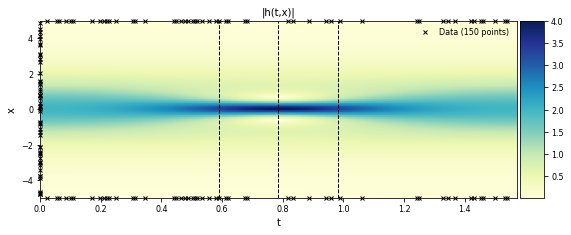

In [20]:
plt.figure(figsize=(10,9))
fig = plt.gcf()    
ax = plt.gca()
ax.axis('off')
    
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

h = ax.imshow(H_pred.T, interpolation='nearest', cmap='YlGnBu', 
              extent=[lb[1], ub[1], lb[0], ub[0]], 
              origin='lower', aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)

ax.plot(X_u_train[:,1], X_u_train[:,0], 'kx', label = 'Data (%d points)' % (X_u_train.shape[0]), markersize = 4, clip_on = False)

line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[75]*np.ones((2,1)), line, 'k--', linewidth = 1)
ax.plot(t[100]*np.ones((2,1)), line, 'k--', linewidth = 1)
ax.plot(t[125]*np.ones((2,1)), line, 'k--', linewidth = 1)    

ax.set_xlabel('t')
ax.set_ylabel('x')
leg = ax.legend(frameon=False, loc = 'best')
#    plt.setp(leg.get_texts(), color='w')
ax.set_title('|h(t,x)|', fontsize = 10)

Text(0.5, 1.0, '$t = 0.98$')

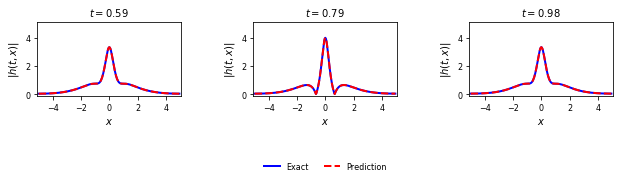

In [21]:
    ####### Row 1: h(t,x) slices ##################  
    plt.figure(figsize=(10,9))
    gs1 = gridspec.GridSpec(1, 3)
    gs1.update(top=1-1/3, bottom=0, left=0.1, right=0.9, wspace=0.5)
    
    ax = plt.subplot(gs1[0, 0])
    ax.plot(x,Exact_h[:,75], 'b-', linewidth = 2, label = 'Exact')       
    ax.plot(x,H_pred[75,:], 'r--', linewidth = 2, label = 'Prediction')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$|h(t,x)|$')    
    ax.set_title('$t = %.2f$' % (t[75]), fontsize = 10)
    ax.axis('square')
    ax.set_xlim([-5.1,5.1])
    ax.set_ylim([-0.1,5.1])
    
    ax = plt.subplot(gs1[0, 1])
    ax.plot(x,Exact_h[:,100], 'b-', linewidth = 2, label = 'Exact')       
    ax.plot(x,H_pred[100,:], 'r--', linewidth = 2, label = 'Prediction')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$|h(t,x)|$')
    ax.axis('square')
    ax.set_xlim([-5.1,5.1])
    ax.set_ylim([-0.1,5.1])
    ax.set_title('$t = %.2f$' % (t[100]), fontsize = 10)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.8), ncol=5, frameon=False)
    
    ax = plt.subplot(gs1[0, 2])
    ax.plot(x,Exact_h[:,125], 'b-', linewidth = 2, label = 'Exact')       
    ax.plot(x,H_pred[125,:], 'r--', linewidth = 2, label = 'Prediction')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$|h(t,x)|$')
    ax.axis('square')
    ax.set_xlim([-5.1,5.1])
    ax.set_ylim([-0.1,5.1])    
    ax.set_title('$t = %.2f$' % (t[125]), fontsize = 10)

# Test Model depending of x_0 size

Extend the training. Now the training returns the three different losses: solution_loss, bounded_loss, pde_loss
In this chapter i tested how the size of the solution set influences the quality of the network, the other loss terms and the training time 

In [ ]:
n0 = [1,5,10,15,20,30,40,50]
sol_n0 = []
bounded_n0 = []
pde_n0 = []
error_u_v_h_n0 = []
models_n0 = []
time_n0 = []

for N in n0:
    N0 = N
    N_b = 50
    N_f = 20000
    
    #choose training samples randomly 
    idx_x = np.random.choice(x.shape[0], N0, replace=False)
    x0 = x[:N0,:]
    u0 = Exact_u[:N0,0:1]
    v0 = Exact_v[:N0,0:1]

    idx_t = np.random.choice(t.shape[0], N_b, replace=False)
    tb  = t[idx_t,:]

    X_f = lb + (ub-lb)*lhs(2, N_f)
    model = PhysicsInformedNN(x0, u0, v0, tb, X_f, layers, lb, ub)
    models_n0.append(model)
    start_time = time.time()                
    solution_loss,bounded_loss,pde_loss = model.train(10000)
    elapsed = time.time() - start_time 
    bounded_n0.append(bounded_loss)
    pde_n0.append(pde_loss)
    sol_n0.append(solution_loss)
    time_n0.append(elapsed)
    u_pred, v_pred, f_u_pred, f_v_pred = model.predict(X_star)
    h_pred = np.sqrt(u_pred**2 + v_pred**2)
            
    error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_h = np.linalg.norm(h_star-h_pred,2)/np.linalg.norm(h_star,2)
    print('Error u: %e' % (error_u))
    print('Error v: %e' % (error_v))
    print('Error h: %e' % (error_h))
    error_u_v_h_n0.append([error_u,error_v,error_h])
    

# Testing for Nf Size


In [11]:
nf = [500,1000,5000]
sol_nf = []
bounded_nf = []
pde_nf = []
error_u_v_h_nf = []
models_nf = []
time_nf = []

for N in nf:
    N0 = 50
    N_b = 50
    N_f = N
    
    #choose training samples randomly 
    idx_x = np.random.choice(x.shape[0], N0, replace=False)
    x0 = x[idx_x,:]
    u0 = Exact_u[idx_x,0:1]
    v0 = Exact_v[idx_x,0:1]

    idx_t = np.random.choice(t.shape[0], N_b, replace=False)
    tb  = t[idx_t,:]

    X_f = lb + (ub-lb)*lhs(2, N_f)
    model = PhysicsInformedNN(x0, u0, v0, tb, X_f, layers, lb, ub)
    models_nf.append(model)
    start_time = time.time()                
    solution_loss,bounded_loss,pde_loss = model.train(10000)
    elapsed = time.time() - start_time 
    bounded_nf.append(bounded_loss)
    pde_nf.append(pde_loss)
    sol_nf.append(solution_loss)
    time_nf.append(elapsed)
    u_pred, v_pred, f_u_pred, f_v_pred = model.predict(X_star)
    h_pred = np.sqrt(u_pred**2 + v_pred**2)
            
    error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_h = np.linalg.norm(h_star-h_pred,2)/np.linalg.norm(h_star,2)
    print('Error u: %e' % (error_u))
    print('Error v: %e' % (error_v))
    print('Error h: %e' % (error_h))
    error_u_v_h_nf.append([error_u,error_v,error_h])

It: 0, Loss: 5.538e-01, Time: 2.07
It: 10, Loss: 4.331e-01, Time: 0.28
It: 20, Loss: 3.550e-01, Time: 0.28
It: 30, Loss: 3.550e-01, Time: 0.28
It: 40, Loss: 3.491e-01, Time: 0.28
It: 50, Loss: 3.486e-01, Time: 0.28
It: 60, Loss: 3.465e-01, Time: 0.28
It: 70, Loss: 3.446e-01, Time: 0.28
It: 80, Loss: 3.414e-01, Time: 0.28
It: 90, Loss: 3.354e-01, Time: 0.28
It: 100, Loss: 3.213e-01, Time: 0.29
It: 110, Loss: 2.853e-01, Time: 0.28
It: 120, Loss: 2.550e-01, Time: 0.28
It: 130, Loss: 2.014e-01, Time: 0.28
It: 140, Loss: 1.688e-01, Time: 0.29
It: 150, Loss: 1.513e-01, Time: 0.29
It: 160, Loss: 1.487e-01, Time: 0.28
It: 170, Loss: 1.356e-01, Time: 0.28
It: 180, Loss: 1.288e-01, Time: 0.28
It: 190, Loss: 1.236e-01, Time: 0.28
It: 200, Loss: 1.182e-01, Time: 0.28
It: 210, Loss: 1.126e-01, Time: 0.28
It: 220, Loss: 1.071e-01, Time: 0.28
It: 230, Loss: 1.067e-01, Time: 0.28
It: 240, Loss: 9.823e-02, Time: 0.28
It: 250, Loss: 9.117e-02, Time: 0.28
It: 260, Loss: 8.471e-02, Time: 0.28
It: 270, Los

It: 2190, Loss: 2.748e-03, Time: 0.28
It: 2200, Loss: 2.756e-03, Time: 0.28
It: 2210, Loss: 2.571e-03, Time: 0.28
It: 2220, Loss: 2.823e-03, Time: 0.28
It: 2230, Loss: 6.883e-03, Time: 0.28
It: 2240, Loss: 5.147e-03, Time: 0.28
It: 2250, Loss: 2.585e-03, Time: 0.28
It: 2260, Loss: 2.822e-03, Time: 0.28
It: 2270, Loss: 2.401e-03, Time: 0.28
It: 2280, Loss: 2.289e-03, Time: 0.28
It: 2290, Loss: 2.259e-03, Time: 0.28
It: 2300, Loss: 3.097e-03, Time: 0.28
It: 2310, Loss: 9.363e-03, Time: 0.28
It: 2320, Loss: 5.433e-03, Time: 0.28
It: 2330, Loss: 2.276e-03, Time: 0.28
It: 2340, Loss: 2.366e-03, Time: 0.28
It: 2350, Loss: 2.312e-03, Time: 0.28
It: 2360, Loss: 2.063e-03, Time: 0.28
It: 2370, Loss: 2.063e-03, Time: 0.28
It: 2380, Loss: 2.005e-03, Time: 0.28
It: 2390, Loss: 1.986e-03, Time: 0.28
It: 2400, Loss: 2.930e-03, Time: 0.28
It: 2410, Loss: 5.688e-03, Time: 0.28
It: 2420, Loss: 2.968e-03, Time: 0.28
It: 2430, Loss: 2.346e-03, Time: 0.28
It: 2440, Loss: 1.889e-03, Time: 0.28
It: 2450, Lo

It: 4350, Loss: 1.182e-03, Time: 0.28
It: 4360, Loss: 2.767e-03, Time: 0.28
It: 4370, Loss: 9.749e-04, Time: 0.28
It: 4380, Loss: 5.332e-04, Time: 0.28
It: 4390, Loss: 4.792e-04, Time: 0.28
It: 4400, Loss: 4.156e-04, Time: 0.28
It: 4410, Loss: 3.719e-04, Time: 0.28
It: 4420, Loss: 5.147e-04, Time: 0.28
It: 4430, Loss: 1.008e-02, Time: 0.28
It: 4440, Loss: 3.191e-03, Time: 0.28
It: 4450, Loss: 1.050e-03, Time: 0.28
It: 4460, Loss: 4.288e-04, Time: 0.28
It: 4470, Loss: 4.983e-04, Time: 0.28
It: 4480, Loss: 3.836e-04, Time: 0.28
It: 4490, Loss: 3.676e-04, Time: 0.28
It: 4500, Loss: 4.304e-04, Time: 0.28
It: 4510, Loss: 2.418e-03, Time: 0.28
It: 4520, Loss: 2.285e-03, Time: 0.29
It: 4530, Loss: 4.519e-04, Time: 0.28
It: 4540, Loss: 7.263e-04, Time: 0.28
It: 4550, Loss: 5.215e-04, Time: 0.28
It: 4560, Loss: 3.466e-04, Time: 0.28
It: 4570, Loss: 3.301e-04, Time: 0.28
It: 4580, Loss: 5.408e-04, Time: 0.28
It: 4590, Loss: 5.963e-03, Time: 0.28
It: 4600, Loss: 5.254e-03, Time: 0.28
It: 4610, Lo

It: 6510, Loss: 4.612e-04, Time: 0.28
It: 6520, Loss: 5.190e-03, Time: 0.28
It: 6530, Loss: 2.378e-03, Time: 0.28
It: 6540, Loss: 8.811e-04, Time: 0.28
It: 6550, Loss: 3.123e-04, Time: 0.28
It: 6560, Loss: 2.943e-04, Time: 0.28
It: 6570, Loss: 1.770e-04, Time: 0.28
It: 6580, Loss: 1.457e-04, Time: 0.28
It: 6590, Loss: 2.683e-04, Time: 0.28
It: 6600, Loss: 5.725e-03, Time: 0.28
It: 6610, Loss: 3.441e-03, Time: 0.28
It: 6620, Loss: 7.642e-04, Time: 0.28
It: 6630, Loss: 3.908e-04, Time: 0.28
It: 6640, Loss: 2.451e-04, Time: 0.28
It: 6650, Loss: 1.544e-04, Time: 0.28
It: 6660, Loss: 1.573e-04, Time: 0.29
It: 6670, Loss: 1.509e-04, Time: 0.28
It: 6680, Loss: 1.751e-04, Time: 0.28
It: 6690, Loss: 8.552e-04, Time: 0.28
It: 6700, Loss: 5.491e-03, Time: 0.28
It: 6710, Loss: 1.546e-03, Time: 0.28
It: 6720, Loss: 3.725e-04, Time: 0.28
It: 6730, Loss: 6.952e-04, Time: 0.28
It: 6740, Loss: 1.690e-03, Time: 0.28
It: 6750, Loss: 3.768e-04, Time: 0.28
It: 6760, Loss: 2.680e-04, Time: 0.28
It: 6770, Lo

It: 8670, Loss: 3.581e-04, Time: 0.28
It: 8680, Loss: 1.657e-04, Time: 0.29
It: 8690, Loss: 9.433e-05, Time: 0.28
It: 8700, Loss: 1.470e-04, Time: 0.28
It: 8710, Loss: 1.143e-03, Time: 0.28
It: 8720, Loss: 2.087e-03, Time: 0.28
It: 8730, Loss: 3.421e-04, Time: 0.28
It: 8740, Loss: 2.102e-04, Time: 0.28
It: 8750, Loss: 1.350e-04, Time: 0.28
It: 8760, Loss: 1.270e-04, Time: 0.28
It: 8770, Loss: 2.196e-04, Time: 0.28
It: 8780, Loss: 2.939e-03, Time: 0.28
It: 8790, Loss: 1.484e-03, Time: 0.28
It: 8800, Loss: 1.305e-03, Time: 0.28
It: 8810, Loss: 1.582e-04, Time: 0.28
It: 8820, Loss: 2.251e-04, Time: 0.28
It: 8830, Loss: 2.807e-04, Time: 0.28
It: 8840, Loss: 7.952e-04, Time: 0.28
It: 8850, Loss: 2.058e-03, Time: 0.28
It: 8860, Loss: 2.877e-04, Time: 0.28
It: 8870, Loss: 2.943e-04, Time: 0.31
It: 8880, Loss: 1.125e-03, Time: 0.32
It: 8890, Loss: 4.314e-04, Time: 0.28
It: 8900, Loss: 3.643e-04, Time: 0.28
It: 8910, Loss: 2.686e-04, Time: 0.28
It: 8920, Loss: 3.459e-04, Time: 0.28
It: 8930, Lo

It: 840, Loss: 3.334e-02, Time: 0.28
It: 850, Loss: 3.300e-02, Time: 0.28
It: 860, Loss: 4.215e-02, Time: 0.28
It: 870, Loss: 3.364e-02, Time: 0.28
It: 880, Loss: 3.268e-02, Time: 0.28
It: 890, Loss: 3.201e-02, Time: 0.28
It: 900, Loss: 3.159e-02, Time: 0.28
It: 910, Loss: 3.125e-02, Time: 0.28
It: 920, Loss: 3.095e-02, Time: 0.28
It: 930, Loss: 3.074e-02, Time: 0.28
It: 940, Loss: 4.662e-02, Time: 0.28
It: 950, Loss: 3.629e-02, Time: 0.29
It: 960, Loss: 3.316e-02, Time: 0.29
It: 970, Loss: 3.048e-02, Time: 0.29
It: 980, Loss: 3.063e-02, Time: 0.29
It: 990, Loss: 2.968e-02, Time: 0.28
It: 1000, Loss: 2.933e-02, Time: 0.28
It: 1010, Loss: 2.906e-02, Time: 0.28
It: 1020, Loss: 2.879e-02, Time: 0.28
It: 1030, Loss: 2.856e-02, Time: 0.29
It: 1040, Loss: 2.847e-02, Time: 0.28
It: 1050, Loss: 5.491e-02, Time: 0.28
It: 1060, Loss: 3.082e-02, Time: 0.28
It: 1070, Loss: 3.076e-02, Time: 0.28
It: 1080, Loss: 2.823e-02, Time: 0.29
It: 1090, Loss: 2.764e-02, Time: 0.29
It: 1100, Loss: 2.737e-02, T

It: 3010, Loss: 6.884e-03, Time: 0.29
It: 3020, Loss: 6.811e-03, Time: 0.28
It: 3030, Loss: 6.827e-03, Time: 0.28
It: 3040, Loss: 3.863e-02, Time: 0.28
It: 3050, Loss: 1.698e-02, Time: 0.28
It: 3060, Loss: 9.056e-03, Time: 0.28
It: 3070, Loss: 8.497e-03, Time: 0.29
It: 3080, Loss: 6.723e-03, Time: 0.28
It: 3090, Loss: 6.581e-03, Time: 0.28
It: 3100, Loss: 6.459e-03, Time: 0.28
It: 3110, Loss: 6.353e-03, Time: 0.29
It: 3120, Loss: 6.271e-03, Time: 0.28
It: 3130, Loss: 6.208e-03, Time: 0.29
It: 3140, Loss: 6.142e-03, Time: 0.29
It: 3150, Loss: 6.078e-03, Time: 0.29
It: 3160, Loss: 6.017e-03, Time: 0.28
It: 3170, Loss: 5.956e-03, Time: 0.28
It: 3180, Loss: 5.896e-03, Time: 0.28
It: 3190, Loss: 5.837e-03, Time: 0.28
It: 3200, Loss: 5.779e-03, Time: 0.28
It: 3210, Loss: 5.755e-03, Time: 0.29
It: 3220, Loss: 1.373e-02, Time: 0.28
It: 3230, Loss: 2.573e-02, Time: 0.28
It: 3240, Loss: 9.404e-03, Time: 0.28
It: 3250, Loss: 6.705e-03, Time: 0.29
It: 3260, Loss: 6.087e-03, Time: 0.28
It: 3270, Lo

It: 5170, Loss: 2.074e-03, Time: 0.29
It: 5180, Loss: 1.977e-03, Time: 0.28
It: 5190, Loss: 1.940e-03, Time: 0.27
It: 5200, Loss: 1.959e-03, Time: 0.27
It: 5210, Loss: 3.190e-03, Time: 0.27
It: 5220, Loss: 9.035e-03, Time: 0.27
It: 5230, Loss: 4.038e-03, Time: 0.27
It: 5240, Loss: 2.431e-03, Time: 0.28
It: 5250, Loss: 1.999e-03, Time: 0.27
It: 5260, Loss: 2.120e-03, Time: 0.27
It: 5270, Loss: 5.630e-03, Time: 0.27
It: 5280, Loss: 1.910e-03, Time: 0.27
It: 5290, Loss: 1.770e-03, Time: 0.27
It: 5300, Loss: 1.761e-03, Time: 0.27
It: 5310, Loss: 1.744e-03, Time: 0.28
It: 5320, Loss: 1.783e-03, Time: 0.27
It: 5330, Loss: 1.895e-03, Time: 0.27
It: 5340, Loss: 3.789e-03, Time: 0.27
It: 5350, Loss: 2.876e-03, Time: 0.27
It: 5360, Loss: 1.770e-02, Time: 0.27
It: 5370, Loss: 6.199e-03, Time: 0.27
It: 5380, Loss: 2.687e-03, Time: 0.27
It: 5390, Loss: 2.023e-03, Time: 0.27
It: 5400, Loss: 1.867e-03, Time: 0.27
It: 5410, Loss: 1.645e-03, Time: 0.27
It: 5420, Loss: 1.660e-03, Time: 0.27
It: 5430, Lo

It: 7330, Loss: 2.706e-03, Time: 0.29
It: 7340, Loss: 4.844e-03, Time: 0.29
It: 7350, Loss: 9.767e-04, Time: 0.29
It: 7360, Loss: 1.267e-03, Time: 0.29
It: 7370, Loss: 1.007e-03, Time: 0.29
It: 7380, Loss: 9.461e-04, Time: 0.28
It: 7390, Loss: 3.328e-03, Time: 0.27
It: 7400, Loss: 1.052e-03, Time: 0.27
It: 7410, Loss: 9.441e-04, Time: 0.27
It: 7420, Loss: 8.424e-04, Time: 0.27
It: 7430, Loss: 8.406e-04, Time: 0.27
It: 7440, Loss: 8.123e-04, Time: 0.27
It: 7450, Loss: 7.380e-04, Time: 0.27
It: 7460, Loss: 8.465e-04, Time: 0.27
It: 7470, Loss: 4.754e-03, Time: 0.28
It: 7480, Loss: 3.179e-03, Time: 0.27
It: 7490, Loss: 2.079e-03, Time: 0.27
It: 7500, Loss: 8.292e-04, Time: 0.27
It: 7510, Loss: 9.332e-04, Time: 0.27
It: 7520, Loss: 7.733e-04, Time: 0.27
It: 7530, Loss: 7.284e-04, Time: 0.27
It: 7540, Loss: 7.243e-04, Time: 0.28
It: 7550, Loss: 9.195e-04, Time: 0.28
It: 7560, Loss: 1.257e-02, Time: 0.27
It: 7570, Loss: 2.554e-03, Time: 0.28
It: 7580, Loss: 2.212e-03, Time: 0.27
It: 7590, Lo

It: 9490, Loss: 5.587e-04, Time: 0.27
It: 9500, Loss: 2.869e-03, Time: 0.27
It: 9510, Loss: 1.092e-03, Time: 0.27
It: 9520, Loss: 1.771e-03, Time: 0.28
It: 9530, Loss: 1.416e-03, Time: 0.27
It: 9540, Loss: 4.513e-04, Time: 0.27
It: 9550, Loss: 5.195e-04, Time: 0.27
It: 9560, Loss: 1.091e-03, Time: 0.28
It: 9570, Loss: 4.435e-03, Time: 0.27
It: 9580, Loss: 6.088e-04, Time: 0.27
It: 9590, Loss: 4.141e-04, Time: 0.27
It: 9600, Loss: 5.339e-04, Time: 0.27
It: 9610, Loss: 4.177e-04, Time: 0.27
It: 9620, Loss: 6.923e-04, Time: 0.27
It: 9630, Loss: 6.577e-03, Time: 0.27
It: 9640, Loss: 2.610e-03, Time: 0.28
It: 9650, Loss: 4.950e-04, Time: 0.27
It: 9660, Loss: 4.604e-04, Time: 0.28
It: 9670, Loss: 4.935e-04, Time: 0.28
It: 9680, Loss: 1.237e-03, Time: 0.27
It: 9690, Loss: 6.958e-03, Time: 0.27
It: 9700, Loss: 2.193e-03, Time: 0.27
It: 9710, Loss: 6.079e-04, Time: 0.28
It: 9720, Loss: 3.583e-04, Time: 0.27
It: 9730, Loss: 3.490e-04, Time: 0.27
It: 9740, Loss: 3.381e-04, Time: 0.27
It: 9750, Lo

It: 1660, Loss: 2.228e-02, Time: 0.30
It: 1670, Loss: 2.239e-02, Time: 0.30
It: 1680, Loss: 3.509e-02, Time: 0.31
It: 1690, Loss: 2.279e-02, Time: 0.30
It: 1700, Loss: 2.321e-02, Time: 0.30
It: 1710, Loss: 2.238e-02, Time: 0.30
It: 1720, Loss: 2.298e-02, Time: 0.30
It: 1730, Loss: 2.842e-02, Time: 0.31
It: 1740, Loss: 2.234e-02, Time: 0.30
It: 1750, Loss: 2.241e-02, Time: 0.31
It: 1760, Loss: 2.141e-02, Time: 0.30
It: 1770, Loss: 2.133e-02, Time: 0.31
It: 1780, Loss: 2.119e-02, Time: 0.30
It: 1790, Loss: 2.131e-02, Time: 0.30
It: 1800, Loss: 2.699e-02, Time: 0.30
It: 1810, Loss: 2.732e-02, Time: 0.30
It: 1820, Loss: 2.241e-02, Time: 0.30
It: 1830, Loss: 2.131e-02, Time: 0.30
It: 1840, Loss: 2.129e-02, Time: 0.31
It: 1850, Loss: 2.481e-02, Time: 0.30
It: 1860, Loss: 2.050e-02, Time: 0.30
It: 1870, Loss: 2.065e-02, Time: 0.30
It: 1880, Loss: 2.099e-02, Time: 0.31
It: 1890, Loss: 2.091e-02, Time: 0.30
It: 1900, Loss: 2.406e-02, Time: 0.30
It: 1910, Loss: 2.085e-02, Time: 0.30
It: 1920, Lo

It: 3820, Loss: 1.496e-02, Time: 0.31
It: 3830, Loss: 9.446e-03, Time: 0.31
It: 3840, Loss: 8.106e-03, Time: 0.31
It: 3850, Loss: 7.610e-03, Time: 0.31
It: 3860, Loss: 7.518e-03, Time: 0.31
It: 3870, Loss: 7.388e-03, Time: 0.31
It: 3880, Loss: 7.804e-03, Time: 0.31
It: 3890, Loss: 2.753e-02, Time: 0.31
It: 3900, Loss: 1.503e-02, Time: 0.31
It: 3910, Loss: 9.204e-03, Time: 0.31
It: 3920, Loss: 7.584e-03, Time: 0.31
It: 3930, Loss: 7.450e-03, Time: 0.32
It: 3940, Loss: 7.289e-03, Time: 0.31
It: 3950, Loss: 7.148e-03, Time: 0.31
It: 3960, Loss: 7.084e-03, Time: 0.31
It: 3970, Loss: 7.019e-03, Time: 0.32
It: 3980, Loss: 6.972e-03, Time: 0.31
It: 3990, Loss: 6.982e-03, Time: 0.31
It: 4000, Loss: 1.208e-02, Time: 0.31
It: 4010, Loss: 2.644e-02, Time: 0.31
It: 4020, Loss: 1.414e-02, Time: 0.31
It: 4030, Loss: 8.465e-03, Time: 0.31
It: 4040, Loss: 7.304e-03, Time: 0.31
It: 4050, Loss: 7.015e-03, Time: 0.31
It: 4060, Loss: 6.836e-03, Time: 0.31
It: 4070, Loss: 6.732e-03, Time: 0.31
It: 4080, Lo

It: 5980, Loss: 6.635e-03, Time: 0.31
It: 5990, Loss: 5.002e-03, Time: 0.31
It: 6000, Loss: 3.383e-03, Time: 0.31
It: 6010, Loss: 3.198e-03, Time: 0.31
It: 6020, Loss: 3.006e-03, Time: 0.32
It: 6030, Loss: 3.610e-03, Time: 0.31
It: 6040, Loss: 2.549e-02, Time: 0.31
It: 6050, Loss: 1.019e-02, Time: 0.31
It: 6060, Loss: 4.961e-03, Time: 0.32
It: 6070, Loss: 3.057e-03, Time: 0.31
It: 6080, Loss: 3.327e-03, Time: 0.31
It: 6090, Loss: 2.987e-03, Time: 0.31
It: 6100, Loss: 3.030e-03, Time: 0.31
It: 6110, Loss: 7.216e-03, Time: 0.31
It: 6120, Loss: 4.960e-03, Time: 0.31
It: 6130, Loss: 7.092e-03, Time: 0.31
It: 6140, Loss: 3.524e-03, Time: 0.31
It: 6150, Loss: 3.465e-03, Time: 0.31
It: 6160, Loss: 2.890e-03, Time: 0.31
It: 6170, Loss: 2.900e-03, Time: 0.31
It: 6180, Loss: 2.836e-03, Time: 0.32
It: 6190, Loss: 2.794e-03, Time: 0.31
It: 6200, Loss: 2.889e-03, Time: 0.32
It: 6210, Loss: 1.086e-02, Time: 0.31
It: 6220, Loss: 6.709e-03, Time: 0.31
It: 6230, Loss: 1.299e-02, Time: 0.31
It: 6240, Lo

It: 8140, Loss: 6.732e-03, Time: 0.31
It: 8150, Loss: 1.859e-03, Time: 0.31
It: 8160, Loss: 1.864e-03, Time: 0.31
It: 8170, Loss: 1.764e-03, Time: 0.31
It: 8180, Loss: 1.654e-03, Time: 0.32
It: 8190, Loss: 2.511e-03, Time: 0.31
It: 8200, Loss: 1.747e-02, Time: 0.31
It: 8210, Loss: 6.585e-03, Time: 0.31
It: 8220, Loss: 2.676e-03, Time: 0.31
It: 8230, Loss: 1.679e-03, Time: 0.31
It: 8240, Loss: 1.569e-03, Time: 0.31
It: 8250, Loss: 1.493e-03, Time: 0.31
It: 8260, Loss: 1.485e-03, Time: 0.31
It: 8270, Loss: 1.465e-03, Time: 0.31
It: 8280, Loss: 1.457e-03, Time: 0.31
It: 8290, Loss: 1.455e-03, Time: 0.31
It: 8300, Loss: 1.797e-03, Time: 0.31
It: 8310, Loss: 4.250e-02, Time: 0.31
It: 8320, Loss: 5.625e-03, Time: 0.31
It: 8330, Loss: 2.017e-03, Time: 0.31
It: 8340, Loss: 1.693e-03, Time: 0.31
It: 8350, Loss: 1.581e-03, Time: 0.31
It: 8360, Loss: 1.523e-03, Time: 0.31
It: 8370, Loss: 1.468e-03, Time: 0.31
It: 8380, Loss: 1.461e-03, Time: 0.31
It: 8390, Loss: 1.456e-03, Time: 0.31
It: 8400, Lo

# Testing for Nb_Size

In [12]:
nb = [5,10,30]
sol_nb = []
bounded_nb = []
pde_nb = []
error_u_v_h_nb = []
models_nb = []
time_nb = []

for N in nb:
    N0 = 50
    N_b = N
    N_f = 20000
    
    #choose training samples randomly 
    idx_x = np.random.choice(x.shape[0], N0, replace=False)
    x0 = x[idx_x,:]
    u0 = Exact_u[idx_x,0:1]
    v0 = Exact_v[idx_x,0:1]

    idx_t = np.random.choice(t.shape[0], N_b, replace=False)
    tb  = t[idx_t,:]

    X_f = lb + (ub-lb)*lhs(2, N_f)
    model = PhysicsInformedNN(x0, u0, v0, tb, X_f, layers, lb, ub)
    models_nb.append(model)
    start_time = time.time()                
    solution_loss,bounded_loss,pde_loss = model.train(10000)
    elapsed = time.time() - start_time 
    bounded_nb.append(bounded_loss)
    pde_nb.append(pde_loss)
    sol_nb.append(solution_loss)
    time_nb.append(elapsed)
    u_pred, v_pred, f_u_pred, f_v_pred = model.predict(X_star)
    h_pred = np.sqrt(u_pred**2 + v_pred**2)
            
    error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_h = np.linalg.norm(h_star-h_pred,2)/np.linalg.norm(h_star,2)
    print('Error u: %e' % (error_u))
    print('Error v: %e' % (error_v))
    print('Error h: %e' % (error_h))
    error_u_v_h_nb.append([error_u,error_v,error_h])

It: 0, Loss: 5.011e-01, Time: 2.24
It: 10, Loss: 3.897e-01, Time: 0.40
It: 20, Loss: 3.127e-01, Time: 0.40
It: 30, Loss: 3.115e-01, Time: 0.40
It: 40, Loss: 3.080e-01, Time: 0.40
It: 50, Loss: 3.047e-01, Time: 0.40
It: 60, Loss: 3.037e-01, Time: 0.40
It: 70, Loss: 3.022e-01, Time: 0.40
It: 80, Loss: 3.000e-01, Time: 0.40
It: 90, Loss: 2.964e-01, Time: 0.40
It: 100, Loss: 2.900e-01, Time: 0.40
It: 110, Loss: 2.773e-01, Time: 0.40
It: 120, Loss: 2.494e-01, Time: 0.40
It: 130, Loss: 2.084e-01, Time: 0.40
It: 140, Loss: 1.786e-01, Time: 0.40
It: 150, Loss: 1.382e-01, Time: 0.40
It: 160, Loss: 1.242e-01, Time: 0.40
It: 170, Loss: 1.186e-01, Time: 0.40
It: 180, Loss: 1.164e-01, Time: 0.40
It: 190, Loss: 1.124e-01, Time: 0.40
It: 200, Loss: 1.087e-01, Time: 0.40
It: 210, Loss: 1.055e-01, Time: 0.40
It: 220, Loss: 1.027e-01, Time: 0.40
It: 230, Loss: 1.001e-01, Time: 0.40
It: 240, Loss: 9.754e-02, Time: 0.40
It: 250, Loss: 9.497e-02, Time: 0.40
It: 260, Loss: 9.571e-02, Time: 0.40
It: 270, Los

It: 2190, Loss: 1.772e-02, Time: 0.40
It: 2200, Loss: 1.806e-02, Time: 0.40
It: 2210, Loss: 2.427e-02, Time: 0.40
It: 2220, Loss: 1.762e-02, Time: 0.40
It: 2230, Loss: 2.585e-02, Time: 0.40
It: 2240, Loss: 2.270e-02, Time: 0.40
It: 2250, Loss: 1.748e-02, Time: 0.40
It: 2260, Loss: 1.787e-02, Time: 0.40
It: 2270, Loss: 1.717e-02, Time: 0.40
It: 2280, Loss: 1.704e-02, Time: 0.40
It: 2290, Loss: 1.694e-02, Time: 0.40
It: 2300, Loss: 1.700e-02, Time: 0.40
It: 2310, Loss: 2.252e-02, Time: 0.40
It: 2320, Loss: 1.983e-02, Time: 0.40
It: 2330, Loss: 1.751e-02, Time: 0.40
It: 2340, Loss: 1.693e-02, Time: 0.40
It: 2350, Loss: 1.686e-02, Time: 0.40
It: 2360, Loss: 1.662e-02, Time: 0.40
It: 2370, Loss: 1.659e-02, Time: 0.40
It: 2380, Loss: 2.578e-02, Time: 0.40
It: 2390, Loss: 2.132e-02, Time: 0.40
It: 2400, Loss: 1.656e-02, Time: 0.40
It: 2410, Loss: 1.664e-02, Time: 0.40
It: 2420, Loss: 1.627e-02, Time: 0.40
It: 2430, Loss: 1.621e-02, Time: 0.40
It: 2440, Loss: 2.042e-02, Time: 0.40
It: 2450, Lo

It: 4350, Loss: 1.611e-02, Time: 0.40
It: 4360, Loss: 1.017e-02, Time: 0.40
It: 4370, Loss: 8.196e-03, Time: 0.40
It: 4380, Loss: 7.812e-03, Time: 0.40
It: 4390, Loss: 7.679e-03, Time: 0.40
It: 4400, Loss: 7.617e-03, Time: 0.40
It: 4410, Loss: 7.554e-03, Time: 0.40
It: 4420, Loss: 7.500e-03, Time: 0.40
It: 4430, Loss: 7.464e-03, Time: 0.40
It: 4440, Loss: 7.424e-03, Time: 0.40
It: 4450, Loss: 7.387e-03, Time: 0.40
It: 4460, Loss: 7.350e-03, Time: 0.40
It: 4470, Loss: 7.320e-03, Time: 0.40
It: 4480, Loss: 9.141e-03, Time: 0.40
It: 4490, Loss: 1.393e-02, Time: 0.40
It: 4500, Loss: 1.438e-02, Time: 0.40
It: 4510, Loss: 8.867e-03, Time: 0.40
It: 4520, Loss: 8.080e-03, Time: 0.40
It: 4530, Loss: 7.288e-03, Time: 0.40
It: 4540, Loss: 7.230e-03, Time: 0.40
It: 4550, Loss: 7.168e-03, Time: 0.40
It: 4560, Loss: 7.107e-03, Time: 0.40
It: 4570, Loss: 7.067e-03, Time: 0.40
It: 4580, Loss: 7.032e-03, Time: 0.40
It: 4590, Loss: 7.092e-03, Time: 0.40
It: 4600, Loss: 1.767e-02, Time: 0.40
It: 4610, Lo

It: 6510, Loss: 3.807e-03, Time: 0.40
It: 6520, Loss: 3.792e-03, Time: 0.40
It: 6530, Loss: 3.800e-03, Time: 0.40
It: 6540, Loss: 6.113e-03, Time: 0.40
It: 6550, Loss: 1.963e-02, Time: 0.40
It: 6560, Loss: 9.894e-03, Time: 0.40
It: 6570, Loss: 4.988e-03, Time: 0.40
It: 6580, Loss: 4.242e-03, Time: 0.40
It: 6590, Loss: 4.023e-03, Time: 0.40
It: 6600, Loss: 3.739e-03, Time: 0.40
It: 6610, Loss: 3.701e-03, Time: 0.40
It: 6620, Loss: 3.684e-03, Time: 0.40
It: 6630, Loss: 3.666e-03, Time: 0.40
It: 6640, Loss: 3.671e-03, Time: 0.40
It: 6650, Loss: 4.934e-03, Time: 0.40
It: 6660, Loss: 2.844e-02, Time: 0.40
It: 6670, Loss: 6.053e-03, Time: 0.40
It: 6680, Loss: 4.447e-03, Time: 0.40
It: 6690, Loss: 4.167e-03, Time: 0.40
It: 6700, Loss: 3.731e-03, Time: 0.40
It: 6710, Loss: 3.729e-03, Time: 0.40
It: 6720, Loss: 3.613e-03, Time: 0.40
It: 6730, Loss: 3.599e-03, Time: 0.40
It: 6740, Loss: 3.573e-03, Time: 0.40
It: 6750, Loss: 3.557e-03, Time: 0.40
It: 6760, Loss: 3.543e-03, Time: 0.40
It: 6770, Lo

It: 8670, Loss: 2.214e-03, Time: 0.40
It: 8680, Loss: 8.545e-03, Time: 0.40
It: 8690, Loss: 5.723e-03, Time: 0.40
It: 8700, Loss: 3.572e-03, Time: 0.40
It: 8710, Loss: 3.516e-03, Time: 0.40
It: 8720, Loss: 2.601e-03, Time: 0.40
It: 8730, Loss: 2.194e-03, Time: 0.40
It: 8740, Loss: 2.166e-03, Time: 0.40
It: 8750, Loss: 2.127e-03, Time: 0.40
It: 8760, Loss: 2.108e-03, Time: 0.40
It: 8770, Loss: 2.100e-03, Time: 0.40
It: 8780, Loss: 2.248e-03, Time: 0.40
It: 8790, Loss: 1.070e-02, Time: 0.40
It: 8800, Loss: 1.053e-02, Time: 0.40
It: 8810, Loss: 2.383e-03, Time: 0.40
It: 8820, Loss: 2.669e-03, Time: 0.40
It: 8830, Loss: 2.380e-03, Time: 0.40
It: 8840, Loss: 2.102e-03, Time: 0.40
It: 8850, Loss: 2.111e-03, Time: 0.40
It: 8860, Loss: 2.208e-03, Time: 0.40
It: 8870, Loss: 6.603e-03, Time: 0.40
It: 8880, Loss: 5.075e-03, Time: 0.40
It: 8890, Loss: 3.239e-03, Time: 0.40
It: 8900, Loss: 3.404e-03, Time: 0.40
It: 8910, Loss: 2.065e-03, Time: 0.40
It: 8920, Loss: 2.093e-03, Time: 0.40
It: 8930, Lo

It: 840, Loss: 4.416e-02, Time: 0.40
It: 850, Loss: 3.808e-02, Time: 0.40
It: 860, Loss: 3.723e-02, Time: 0.40
It: 870, Loss: 3.679e-02, Time: 0.40
It: 880, Loss: 3.837e-02, Time: 0.40
It: 890, Loss: 3.845e-02, Time: 0.40
It: 900, Loss: 3.639e-02, Time: 0.40
It: 910, Loss: 3.577e-02, Time: 0.40
It: 920, Loss: 3.552e-02, Time: 0.40
It: 930, Loss: 3.528e-02, Time: 0.40
It: 940, Loss: 4.498e-02, Time: 0.40
It: 950, Loss: 3.528e-02, Time: 0.40
It: 960, Loss: 3.443e-02, Time: 0.41
It: 970, Loss: 3.473e-02, Time: 0.40
It: 980, Loss: 3.998e-02, Time: 0.40
It: 990, Loss: 3.688e-02, Time: 0.40
It: 1000, Loss: 3.379e-02, Time: 0.40
It: 1010, Loss: 3.358e-02, Time: 0.40
It: 1020, Loss: 3.344e-02, Time: 0.40
It: 1030, Loss: 3.854e-02, Time: 0.40
It: 1040, Loss: 3.525e-02, Time: 0.40
It: 1050, Loss: 3.236e-02, Time: 0.40
It: 1060, Loss: 3.402e-02, Time: 0.40
It: 1070, Loss: 3.196e-02, Time: 0.40
It: 1080, Loss: 3.181e-02, Time: 0.40
It: 1090, Loss: 3.148e-02, Time: 0.40
It: 1100, Loss: 3.149e-02, T

It: 3010, Loss: 1.027e-02, Time: 0.40
It: 3020, Loss: 4.179e-02, Time: 0.40
It: 3030, Loss: 1.371e-02, Time: 0.40
It: 3040, Loss: 1.344e-02, Time: 0.40
It: 3050, Loss: 1.072e-02, Time: 0.41
It: 3060, Loss: 9.679e-03, Time: 0.40
It: 3070, Loss: 9.705e-03, Time: 0.40
It: 3080, Loss: 9.569e-03, Time: 0.40
It: 3090, Loss: 9.554e-03, Time: 0.40
It: 3100, Loss: 1.485e-02, Time: 0.40
It: 3110, Loss: 1.100e-02, Time: 0.40
It: 3120, Loss: 1.212e-02, Time: 0.46
It: 3130, Loss: 1.088e-02, Time: 0.40
It: 3140, Loss: 9.443e-03, Time: 0.40
It: 3150, Loss: 9.326e-03, Time: 0.40
It: 3160, Loss: 9.186e-03, Time: 0.40
It: 3170, Loss: 9.118e-03, Time: 0.40
It: 3180, Loss: 9.034e-03, Time: 0.40
It: 3190, Loss: 8.970e-03, Time: 0.40
It: 3200, Loss: 8.910e-03, Time: 0.40
It: 3210, Loss: 8.863e-03, Time: 0.40
It: 3220, Loss: 1.070e-02, Time: 0.40
It: 3230, Loss: 1.520e-02, Time: 0.40
It: 3240, Loss: 1.564e-02, Time: 0.40
It: 3250, Loss: 1.082e-02, Time: 0.40
It: 3260, Loss: 9.258e-03, Time: 0.40
It: 3270, Lo

It: 5170, Loss: 8.432e-03, Time: 0.40
It: 5180, Loss: 4.237e-03, Time: 0.40
It: 5190, Loss: 5.273e-03, Time: 0.40
It: 5200, Loss: 3.985e-03, Time: 0.40
It: 5210, Loss: 3.487e-03, Time: 0.40
It: 5220, Loss: 3.426e-03, Time: 0.40
It: 5230, Loss: 3.396e-03, Time: 0.40
It: 5240, Loss: 3.296e-03, Time: 0.40
It: 5250, Loss: 3.232e-03, Time: 0.40
It: 5260, Loss: 3.221e-03, Time: 0.40
It: 5270, Loss: 3.198e-03, Time: 0.40
It: 5280, Loss: 3.259e-03, Time: 0.40
It: 5290, Loss: 1.119e-02, Time: 0.40
It: 5300, Loss: 9.776e-03, Time: 0.40
It: 5310, Loss: 3.629e-03, Time: 0.40
It: 5320, Loss: 4.107e-03, Time: 0.40
It: 5330, Loss: 3.648e-03, Time: 0.40
It: 5340, Loss: 3.210e-03, Time: 0.40
It: 5350, Loss: 3.131e-03, Time: 0.40
It: 5360, Loss: 3.110e-03, Time: 0.40
It: 5370, Loss: 3.081e-03, Time: 0.40
It: 5380, Loss: 3.062e-03, Time: 0.40
It: 5390, Loss: 3.047e-03, Time: 0.40
It: 5400, Loss: 3.052e-03, Time: 0.40
It: 5410, Loss: 5.535e-03, Time: 0.40
It: 5420, Loss: 2.187e-02, Time: 0.40
It: 5430, Lo

It: 7330, Loss: 3.643e-03, Time: 0.40
It: 7340, Loss: 1.753e-03, Time: 0.40
It: 7350, Loss: 1.856e-03, Time: 0.40
It: 7360, Loss: 1.694e-03, Time: 0.40
It: 7370, Loss: 1.663e-03, Time: 0.40
It: 7380, Loss: 1.624e-03, Time: 0.40
It: 7390, Loss: 1.616e-03, Time: 0.40
It: 7400, Loss: 1.606e-03, Time: 0.40
It: 7410, Loss: 1.596e-03, Time: 0.40
It: 7420, Loss: 1.591e-03, Time: 0.40
It: 7430, Loss: 1.802e-03, Time: 0.40
It: 7440, Loss: 2.224e-02, Time: 0.40
It: 7450, Loss: 1.255e-02, Time: 0.40
It: 7460, Loss: 4.368e-03, Time: 0.40
It: 7470, Loss: 1.951e-03, Time: 0.40
It: 7480, Loss: 1.641e-03, Time: 0.40
It: 7490, Loss: 1.675e-03, Time: 0.40
It: 7500, Loss: 1.634e-03, Time: 0.40
It: 7510, Loss: 1.562e-03, Time: 0.40
It: 7520, Loss: 1.555e-03, Time: 0.40
It: 7530, Loss: 1.540e-03, Time: 0.40
It: 7540, Loss: 1.537e-03, Time: 0.40
It: 7550, Loss: 1.914e-03, Time: 0.40
It: 7560, Loss: 2.973e-02, Time: 0.40
It: 7570, Loss: 4.781e-03, Time: 0.40
It: 7580, Loss: 3.100e-03, Time: 0.40
It: 7590, Lo

It: 9490, Loss: 2.797e-03, Time: 0.40
It: 9500, Loss: 1.603e-03, Time: 0.40
It: 9510, Loss: 1.015e-03, Time: 0.40
It: 9520, Loss: 1.021e-03, Time: 0.40
It: 9530, Loss: 9.332e-04, Time: 0.40
It: 9540, Loss: 9.270e-04, Time: 0.40
It: 9550, Loss: 1.006e-03, Time: 0.40
It: 9560, Loss: 4.499e-03, Time: 0.40
It: 9570, Loss: 8.153e-03, Time: 0.40
It: 9580, Loss: 2.990e-03, Time: 0.40
It: 9590, Loss: 1.804e-03, Time: 0.40
It: 9600, Loss: 1.301e-03, Time: 0.40
It: 9610, Loss: 1.047e-03, Time: 0.40
It: 9620, Loss: 9.247e-04, Time: 0.40
It: 9630, Loss: 9.232e-04, Time: 0.40
It: 9640, Loss: 9.173e-04, Time: 0.40
It: 9650, Loss: 1.104e-03, Time: 0.40
It: 9660, Loss: 1.487e-02, Time: 0.40
It: 9670, Loss: 9.006e-03, Time: 0.40
It: 9680, Loss: 1.359e-03, Time: 0.40
It: 9690, Loss: 1.852e-03, Time: 0.40
It: 9700, Loss: 1.140e-03, Time: 0.40
It: 9710, Loss: 1.001e-03, Time: 0.40
It: 9720, Loss: 9.092e-04, Time: 0.40
It: 9730, Loss: 9.073e-04, Time: 0.40
It: 9740, Loss: 9.045e-04, Time: 0.40
It: 9750, Lo

It: 1660, Loss: 2.065e-02, Time: 0.40
It: 1670, Loss: 2.174e-02, Time: 0.40
It: 1680, Loss: 2.311e-02, Time: 0.40
It: 1690, Loss: 2.047e-02, Time: 0.40
It: 1700, Loss: 1.990e-02, Time: 0.40
It: 1710, Loss: 1.985e-02, Time: 0.40
It: 1720, Loss: 1.993e-02, Time: 0.40
It: 1730, Loss: 3.138e-02, Time: 0.40
It: 1740, Loss: 2.226e-02, Time: 0.40
It: 1750, Loss: 2.077e-02, Time: 0.40
It: 1760, Loss: 1.960e-02, Time: 0.40
It: 1770, Loss: 1.948e-02, Time: 0.40
It: 1780, Loss: 1.939e-02, Time: 0.40
It: 1790, Loss: 1.925e-02, Time: 0.40
It: 1800, Loss: 1.921e-02, Time: 0.40
It: 1810, Loss: 2.305e-02, Time: 0.40
It: 1820, Loss: 2.322e-02, Time: 0.40
It: 1830, Loss: 1.954e-02, Time: 0.40
It: 1840, Loss: 1.964e-02, Time: 0.40
It: 1850, Loss: 1.913e-02, Time: 0.40
It: 1860, Loss: 2.087e-02, Time: 0.40
It: 1870, Loss: 1.947e-02, Time: 0.40
It: 1880, Loss: 1.865e-02, Time: 0.41
It: 1890, Loss: 1.868e-02, Time: 0.40
It: 1900, Loss: 1.845e-02, Time: 0.40
It: 1910, Loss: 1.856e-02, Time: 0.40
It: 1920, Lo

It: 3820, Loss: 9.921e-03, Time: 0.39
It: 3830, Loss: 9.944e-03, Time: 0.39
It: 3840, Loss: 1.420e-02, Time: 0.39
It: 3850, Loss: 1.240e-02, Time: 0.39
It: 3860, Loss: 1.057e-02, Time: 0.39
It: 3870, Loss: 1.064e-02, Time: 0.39
It: 3880, Loss: 9.799e-03, Time: 0.39
It: 3890, Loss: 9.813e-03, Time: 0.39
It: 3900, Loss: 9.681e-03, Time: 0.39
It: 3910, Loss: 9.651e-03, Time: 0.39
It: 3920, Loss: 9.613e-03, Time: 0.39
It: 3930, Loss: 9.577e-03, Time: 0.40
It: 3940, Loss: 9.694e-03, Time: 0.40
It: 3950, Loss: 2.490e-02, Time: 0.39
It: 3960, Loss: 1.639e-02, Time: 0.39
It: 3970, Loss: 1.245e-02, Time: 0.39
It: 3980, Loss: 1.059e-02, Time: 0.39
It: 3990, Loss: 9.685e-03, Time: 0.39
It: 4000, Loss: 9.440e-03, Time: 0.39
It: 4010, Loss: 9.435e-03, Time: 0.39
It: 4020, Loss: 9.358e-03, Time: 0.39
It: 4030, Loss: 9.388e-03, Time: 0.39
It: 4040, Loss: 1.598e-02, Time: 0.39
It: 4050, Loss: 1.398e-02, Time: 0.39
It: 4060, Loss: 9.492e-03, Time: 0.39
It: 4070, Loss: 9.472e-03, Time: 0.39
It: 4080, Lo

It: 5980, Loss: 1.813e-02, Time: 0.40
It: 5990, Loss: 9.344e-03, Time: 0.40
It: 6000, Loss: 6.692e-03, Time: 0.40
It: 6010, Loss: 5.516e-03, Time: 0.40
It: 6020, Loss: 5.098e-03, Time: 0.40
It: 6030, Loss: 4.957e-03, Time: 0.40
It: 6040, Loss: 4.883e-03, Time: 0.40
It: 6050, Loss: 4.836e-03, Time: 0.40
It: 6060, Loss: 4.816e-03, Time: 0.40
It: 6070, Loss: 4.796e-03, Time: 0.40
It: 6080, Loss: 4.777e-03, Time: 0.40
It: 6090, Loss: 4.816e-03, Time: 0.40
It: 6100, Loss: 1.215e-02, Time: 0.40
It: 6110, Loss: 1.072e-02, Time: 0.40
It: 6120, Loss: 7.016e-03, Time: 0.40
It: 6130, Loss: 6.126e-03, Time: 0.40
It: 6140, Loss: 5.309e-03, Time: 0.40
It: 6150, Loss: 4.817e-03, Time: 0.40
It: 6160, Loss: 4.702e-03, Time: 0.40
It: 6170, Loss: 4.697e-03, Time: 0.40
It: 6180, Loss: 4.655e-03, Time: 0.40
It: 6190, Loss: 4.638e-03, Time: 0.40
It: 6200, Loss: 4.618e-03, Time: 0.40
It: 6210, Loss: 4.598e-03, Time: 0.40
It: 6220, Loss: 4.580e-03, Time: 0.40
It: 6230, Loss: 4.565e-03, Time: 0.40
It: 6240, Lo

It: 8140, Loss: 2.836e-03, Time: 0.40
It: 8150, Loss: 2.724e-03, Time: 0.40
It: 8160, Loss: 2.669e-03, Time: 0.40
It: 8170, Loss: 2.728e-03, Time: 0.40
It: 8180, Loss: 6.442e-03, Time: 0.40
It: 8190, Loss: 3.720e-03, Time: 0.40
It: 8200, Loss: 6.378e-03, Time: 0.40
It: 8210, Loss: 2.873e-03, Time: 0.40
It: 8220, Loss: 3.075e-03, Time: 0.40
It: 8230, Loss: 2.735e-03, Time: 0.40
It: 8240, Loss: 2.718e-03, Time: 0.40
It: 8250, Loss: 4.240e-03, Time: 0.40
It: 8260, Loss: 1.821e-02, Time: 0.40
It: 8270, Loss: 3.045e-03, Time: 0.40
It: 8280, Loss: 4.210e-03, Time: 0.40
It: 8290, Loss: 2.805e-03, Time: 0.40
It: 8300, Loss: 2.665e-03, Time: 0.40
It: 8310, Loss: 2.661e-03, Time: 0.40
It: 8320, Loss: 2.603e-03, Time: 0.40
It: 8330, Loss: 2.572e-03, Time: 0.40
It: 8340, Loss: 2.553e-03, Time: 0.40
It: 8350, Loss: 2.543e-03, Time: 0.40
It: 8360, Loss: 2.624e-03, Time: 0.40
It: 8370, Loss: 5.095e-03, Time: 0.40
It: 8380, Loss: 7.706e-03, Time: 0.40
It: 8390, Loss: 2.619e-03, Time: 0.40
It: 8400, Lo

# Testing for different Architecture sizes

In [13]:
architectures = [[2, 100, 100, 2],
                 [2, 100, 2],
                 [2, 50, 2]]
sol_l = []
bounded_l = []
pde_l = []
error_u_v_h_l = []
models_l = []
time_l = []

for layers in architectures:
    N0 = 50
    N_b = 50
    N_f = 20000
    
    #choose training samples randomly 
    idx_x = np.random.choice(x.shape[0], N0, replace=False)
    x0 = x[idx_x,:]
    u0 = Exact_u[idx_x,0:1]
    v0 = Exact_v[idx_x,0:1]

    idx_t = np.random.choice(t.shape[0], N_b, replace=False)
    tb  = t[idx_t,:]

    X_f = lb + (ub-lb)*lhs(2, N_f)
    model = PhysicsInformedNN(x0, u0, v0, tb, X_f, layers, lb, ub)
    models_l.append(model)
    start_time = time.time()                
    solution_loss,bounded_loss,pde_loss = model.train(10000)
    elapsed = time.time() - start_time 
    bounded_l.append(bounded_loss)
    pde_l.append(pde_loss)
    sol_l.append(solution_loss)
    time_l.append(elapsed)
    u_pred, v_pred, f_u_pred, f_v_pred = model.predict(X_star)
    h_pred = np.sqrt(u_pred**2 + v_pred**2)
            
    error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_h = np.linalg.norm(h_star-h_pred,2)/np.linalg.norm(h_star,2)
    print('Error u: %e' % (error_u))
    print('Error v: %e' % (error_v))
    print('Error h: %e' % (error_h))
    error_u_v_h_l.append([error_u,error_v,error_h])



It: 0, Loss: 8.188e-01, Time: 1.79
It: 10, Loss: 5.864e-01, Time: 0.25
It: 20, Loss: 4.891e-01, Time: 0.25
It: 30, Loss: 4.336e-01, Time: 0.25
It: 40, Loss: 4.345e-01, Time: 0.26
It: 50, Loss: 4.284e-01, Time: 0.25
It: 60, Loss: 4.275e-01, Time: 0.25
It: 70, Loss: 4.257e-01, Time: 0.25
It: 80, Loss: 4.248e-01, Time: 0.25
It: 90, Loss: 4.234e-01, Time: 0.25
It: 100, Loss: 4.219e-01, Time: 0.25
It: 110, Loss: 4.198e-01, Time: 0.25
It: 120, Loss: 4.171e-01, Time: 0.25
It: 130, Loss: 4.136e-01, Time: 0.25
It: 140, Loss: 4.088e-01, Time: 0.25
It: 150, Loss: 4.025e-01, Time: 0.25
It: 160, Loss: 3.944e-01, Time: 0.25
It: 170, Loss: 3.840e-01, Time: 0.25
It: 180, Loss: 3.713e-01, Time: 0.25
It: 190, Loss: 3.561e-01, Time: 0.25
It: 200, Loss: 3.384e-01, Time: 0.25
It: 210, Loss: 3.182e-01, Time: 0.25
It: 220, Loss: 2.970e-01, Time: 0.25
It: 230, Loss: 2.746e-01, Time: 0.25
It: 240, Loss: 2.509e-01, Time: 0.25
It: 250, Loss: 2.276e-01, Time: 0.25
It: 260, Loss: 2.056e-01, Time: 0.25
It: 270, Los

It: 2190, Loss: 4.304e-02, Time: 0.25
It: 2200, Loss: 4.298e-02, Time: 0.25
It: 2210, Loss: 4.335e-02, Time: 0.25
It: 2220, Loss: 4.301e-02, Time: 0.25
It: 2230, Loss: 4.288e-02, Time: 0.25
It: 2240, Loss: 4.275e-02, Time: 0.24
It: 2250, Loss: 4.265e-02, Time: 0.25
It: 2260, Loss: 4.259e-02, Time: 0.25
It: 2270, Loss: 4.297e-02, Time: 0.25
It: 2280, Loss: 4.269e-02, Time: 0.25
It: 2290, Loss: 4.240e-02, Time: 0.42
It: 2300, Loss: 4.235e-02, Time: 0.31
It: 2310, Loss: 4.224e-02, Time: 0.25
It: 2320, Loss: 4.216e-02, Time: 0.26
It: 2330, Loss: 4.209e-02, Time: 0.34
It: 2340, Loss: 4.202e-02, Time: 0.43
It: 2350, Loss: 4.200e-02, Time: 0.41
It: 2360, Loss: 4.557e-02, Time: 0.36
It: 2370, Loss: 4.287e-02, Time: 0.25
It: 2380, Loss: 4.191e-02, Time: 0.26
It: 2390, Loss: 4.173e-02, Time: 0.25
It: 2400, Loss: 4.166e-02, Time: 0.25
It: 2410, Loss: 4.155e-02, Time: 0.25
It: 2420, Loss: 4.148e-02, Time: 0.25
It: 2430, Loss: 4.140e-02, Time: 0.25
It: 2440, Loss: 4.133e-02, Time: 0.25
It: 2450, Lo

It: 4350, Loss: 2.921e-02, Time: 0.24
It: 4360, Loss: 2.921e-02, Time: 0.25
It: 4370, Loss: 3.048e-02, Time: 0.25
It: 4380, Loss: 2.943e-02, Time: 0.25
It: 4390, Loss: 2.930e-02, Time: 0.24
It: 4400, Loss: 2.913e-02, Time: 0.25
It: 4410, Loss: 2.898e-02, Time: 0.25
It: 4420, Loss: 2.903e-02, Time: 0.25
It: 4430, Loss: 2.967e-02, Time: 0.25
It: 4440, Loss: 2.890e-02, Time: 0.25
It: 4450, Loss: 2.877e-02, Time: 0.25
It: 4460, Loss: 2.876e-02, Time: 0.25
It: 4470, Loss: 2.869e-02, Time: 0.24
It: 4480, Loss: 2.867e-02, Time: 0.25
It: 4490, Loss: 2.879e-02, Time: 0.25
It: 4500, Loss: 2.919e-02, Time: 0.25
It: 4510, Loss: 2.970e-02, Time: 0.25
It: 4520, Loss: 2.872e-02, Time: 0.25
It: 4530, Loss: 2.853e-02, Time: 0.25
It: 4540, Loss: 2.846e-02, Time: 0.25
It: 4550, Loss: 2.840e-02, Time: 0.25
It: 4560, Loss: 2.847e-02, Time: 0.25
It: 4570, Loss: 2.949e-02, Time: 0.25
It: 4580, Loss: 2.863e-02, Time: 0.25
It: 4590, Loss: 2.827e-02, Time: 0.25
It: 4600, Loss: 2.819e-02, Time: 0.25
It: 4610, Lo

It: 6510, Loss: 2.217e-02, Time: 0.25
It: 6520, Loss: 2.217e-02, Time: 0.25
It: 6530, Loss: 2.214e-02, Time: 0.25
It: 6540, Loss: 2.212e-02, Time: 0.25
It: 6550, Loss: 2.232e-02, Time: 0.25
It: 6560, Loss: 2.485e-02, Time: 0.25
It: 6570, Loss: 2.269e-02, Time: 0.25
It: 6580, Loss: 2.219e-02, Time: 0.25
It: 6590, Loss: 2.207e-02, Time: 0.25
It: 6600, Loss: 2.199e-02, Time: 0.25
It: 6610, Loss: 2.197e-02, Time: 0.25
It: 6620, Loss: 2.195e-02, Time: 0.25
It: 6630, Loss: 2.201e-02, Time: 0.25
It: 6640, Loss: 2.438e-02, Time: 0.25
It: 6650, Loss: 2.262e-02, Time: 0.25
It: 6660, Loss: 2.203e-02, Time: 0.25
It: 6670, Loss: 2.196e-02, Time: 0.25
It: 6680, Loss: 2.186e-02, Time: 0.25
It: 6690, Loss: 2.181e-02, Time: 0.25
It: 6700, Loss: 2.179e-02, Time: 0.25
It: 6710, Loss: 2.177e-02, Time: 0.25
It: 6720, Loss: 2.178e-02, Time: 0.25
It: 6730, Loss: 2.317e-02, Time: 0.25
It: 6740, Loss: 2.206e-02, Time: 0.25
It: 6750, Loss: 2.222e-02, Time: 0.25
It: 6760, Loss: 2.170e-02, Time: 0.25
It: 6770, Lo

It: 8670, Loss: 1.888e-02, Time: 0.25
It: 8680, Loss: 1.990e-02, Time: 0.25
It: 8690, Loss: 1.895e-02, Time: 0.25
It: 8700, Loss: 1.862e-02, Time: 0.25
It: 8710, Loss: 1.850e-02, Time: 0.25
It: 8720, Loss: 1.843e-02, Time: 0.25
It: 8730, Loss: 1.840e-02, Time: 0.25
It: 8740, Loss: 1.847e-02, Time: 0.25
It: 8750, Loss: 2.078e-02, Time: 0.25
It: 8760, Loss: 1.915e-02, Time: 0.25
It: 8770, Loss: 1.878e-02, Time: 0.25
It: 8780, Loss: 1.842e-02, Time: 0.25
It: 8790, Loss: 1.833e-02, Time: 0.25
It: 8800, Loss: 1.830e-02, Time: 0.25
It: 8810, Loss: 1.828e-02, Time: 0.25
It: 8820, Loss: 1.830e-02, Time: 0.25
It: 8830, Loss: 1.939e-02, Time: 0.25
It: 8840, Loss: 1.854e-02, Time: 0.25
It: 8850, Loss: 1.862e-02, Time: 0.25
It: 8860, Loss: 1.837e-02, Time: 0.25
It: 8870, Loss: 1.821e-02, Time: 0.25
It: 8880, Loss: 1.818e-02, Time: 0.25
It: 8890, Loss: 1.816e-02, Time: 0.25
It: 8900, Loss: 1.815e-02, Time: 0.25
It: 8910, Loss: 1.813e-02, Time: 0.25
It: 8920, Loss: 1.814e-02, Time: 0.25
It: 8930, Lo

It: 840, Loss: 3.075e-01, Time: 0.18
It: 850, Loss: 3.034e-01, Time: 0.18
It: 860, Loss: 2.993e-01, Time: 0.18
It: 870, Loss: 2.952e-01, Time: 0.18
It: 880, Loss: 2.911e-01, Time: 0.18
It: 890, Loss: 2.869e-01, Time: 0.18
It: 900, Loss: 2.828e-01, Time: 0.18
It: 910, Loss: 2.786e-01, Time: 0.18
It: 920, Loss: 2.744e-01, Time: 0.18
It: 930, Loss: 2.703e-01, Time: 0.18
It: 940, Loss: 2.662e-01, Time: 0.18
It: 950, Loss: 2.621e-01, Time: 0.18
It: 960, Loss: 2.581e-01, Time: 0.18
It: 970, Loss: 2.541e-01, Time: 0.18
It: 980, Loss: 2.502e-01, Time: 0.18
It: 990, Loss: 2.463e-01, Time: 0.18
It: 1000, Loss: 2.425e-01, Time: 0.18
It: 1010, Loss: 2.387e-01, Time: 0.18
It: 1020, Loss: 2.350e-01, Time: 0.18
It: 1030, Loss: 2.313e-01, Time: 0.18
It: 1040, Loss: 2.277e-01, Time: 0.18
It: 1050, Loss: 2.241e-01, Time: 0.18
It: 1060, Loss: 2.206e-01, Time: 0.18
It: 1070, Loss: 2.171e-01, Time: 0.18
It: 1080, Loss: 2.136e-01, Time: 0.18
It: 1090, Loss: 2.102e-01, Time: 0.18
It: 1100, Loss: 2.068e-01, T

It: 3020, Loss: 7.392e-02, Time: 0.18
It: 3030, Loss: 7.388e-02, Time: 0.18
It: 3040, Loss: 7.374e-02, Time: 0.18
It: 3050, Loss: 7.363e-02, Time: 0.18
It: 3060, Loss: 7.354e-02, Time: 0.18
It: 3070, Loss: 7.345e-02, Time: 0.18
It: 3080, Loss: 7.337e-02, Time: 0.18
It: 3090, Loss: 7.328e-02, Time: 0.18
It: 3100, Loss: 7.319e-02, Time: 0.18
It: 3110, Loss: 7.311e-02, Time: 0.18
It: 3120, Loss: 7.304e-02, Time: 0.18
It: 3130, Loss: 7.298e-02, Time: 0.18
It: 3140, Loss: 7.288e-02, Time: 0.18
It: 3150, Loss: 7.279e-02, Time: 0.18
It: 3160, Loss: 7.271e-02, Time: 0.18
It: 3170, Loss: 7.264e-02, Time: 0.18
It: 3180, Loss: 7.256e-02, Time: 0.18
It: 3190, Loss: 7.249e-02, Time: 0.18
It: 3200, Loss: 7.242e-02, Time: 0.18
It: 3210, Loss: 7.235e-02, Time: 0.18
It: 3220, Loss: 7.230e-02, Time: 0.18
It: 3230, Loss: 7.221e-02, Time: 0.18
It: 3240, Loss: 7.214e-02, Time: 0.18
It: 3250, Loss: 7.207e-02, Time: 0.18
It: 3260, Loss: 7.200e-02, Time: 0.18
It: 3270, Loss: 7.194e-02, Time: 0.18
It: 3280, Lo

It: 5180, Loss: 6.289e-02, Time: 0.18
It: 5190, Loss: 6.285e-02, Time: 0.18
It: 5200, Loss: 6.282e-02, Time: 0.18
It: 5210, Loss: 6.282e-02, Time: 0.18
It: 5220, Loss: 6.275e-02, Time: 0.18
It: 5230, Loss: 6.270e-02, Time: 0.18
It: 5240, Loss: 6.267e-02, Time: 0.18
It: 5250, Loss: 6.263e-02, Time: 0.18
It: 5260, Loss: 6.260e-02, Time: 0.18
It: 5270, Loss: 6.263e-02, Time: 0.18
It: 5280, Loss: 6.254e-02, Time: 0.18
It: 5290, Loss: 6.249e-02, Time: 0.18
It: 5300, Loss: 6.246e-02, Time: 0.18
It: 5310, Loss: 6.242e-02, Time: 0.18
It: 5320, Loss: 6.239e-02, Time: 0.18
It: 5330, Loss: 6.240e-02, Time: 0.18
It: 5340, Loss: 6.232e-02, Time: 0.18
It: 5350, Loss: 6.230e-02, Time: 0.18
It: 5360, Loss: 6.226e-02, Time: 0.18
It: 5370, Loss: 6.222e-02, Time: 0.18
It: 5380, Loss: 6.218e-02, Time: 0.18
It: 5390, Loss: 6.215e-02, Time: 0.18
It: 5400, Loss: 6.212e-02, Time: 0.18
It: 5410, Loss: 6.208e-02, Time: 0.18
It: 5420, Loss: 6.205e-02, Time: 0.18
It: 5430, Loss: 6.201e-02, Time: 0.18
It: 5440, Lo

It: 7340, Loss: 5.597e-02, Time: 0.18
It: 7350, Loss: 5.595e-02, Time: 0.18
It: 7360, Loss: 5.592e-02, Time: 0.18
It: 7370, Loss: 5.592e-02, Time: 0.18
It: 7380, Loss: 5.597e-02, Time: 0.18
It: 7390, Loss: 5.585e-02, Time: 0.18
It: 7400, Loss: 5.583e-02, Time: 0.18
It: 7410, Loss: 5.579e-02, Time: 0.18
It: 7420, Loss: 5.576e-02, Time: 0.18
It: 7430, Loss: 5.574e-02, Time: 0.18
It: 7440, Loss: 5.571e-02, Time: 0.18
It: 7450, Loss: 5.568e-02, Time: 0.18
It: 7460, Loss: 5.566e-02, Time: 0.18
It: 7470, Loss: 5.564e-02, Time: 0.18
It: 7480, Loss: 5.569e-02, Time: 0.18
It: 7490, Loss: 5.561e-02, Time: 0.18
It: 7500, Loss: 5.556e-02, Time: 0.18
It: 7510, Loss: 5.553e-02, Time: 0.18
It: 7520, Loss: 5.551e-02, Time: 0.18
It: 7530, Loss: 5.550e-02, Time: 0.18
It: 7540, Loss: 5.552e-02, Time: 0.18
It: 7550, Loss: 5.545e-02, Time: 0.18
It: 7560, Loss: 5.541e-02, Time: 0.18
It: 7570, Loss: 5.538e-02, Time: 0.18
It: 7580, Loss: 5.535e-02, Time: 0.18
It: 7590, Loss: 5.533e-02, Time: 0.18
It: 7600, Lo

It: 9510, Loss: 5.170e-02, Time: 0.18
It: 9520, Loss: 5.169e-02, Time: 0.18
It: 9530, Loss: 5.167e-02, Time: 0.18
It: 9540, Loss: 5.166e-02, Time: 0.18
It: 9550, Loss: 5.165e-02, Time: 0.18
It: 9560, Loss: 5.164e-02, Time: 0.18
It: 9570, Loss: 5.167e-02, Time: 0.18
It: 9580, Loss: 5.168e-02, Time: 0.18
It: 9590, Loss: 5.163e-02, Time: 0.18
It: 9600, Loss: 5.160e-02, Time: 0.18
It: 9610, Loss: 5.158e-02, Time: 0.18
It: 9620, Loss: 5.157e-02, Time: 0.18
It: 9630, Loss: 5.156e-02, Time: 0.18
It: 9640, Loss: 5.154e-02, Time: 0.18
It: 9650, Loss: 5.153e-02, Time: 0.18
It: 9660, Loss: 5.152e-02, Time: 0.18
It: 9670, Loss: 5.151e-02, Time: 0.18
It: 9680, Loss: 5.150e-02, Time: 0.18
It: 9690, Loss: 5.173e-02, Time: 0.18
It: 9700, Loss: 5.154e-02, Time: 0.18
It: 9710, Loss: 5.147e-02, Time: 0.30
It: 9720, Loss: 5.146e-02, Time: 0.32
It: 9730, Loss: 5.144e-02, Time: 0.18
It: 9740, Loss: 5.143e-02, Time: 0.18
It: 9750, Loss: 5.142e-02, Time: 0.18
It: 9760, Loss: 5.141e-02, Time: 0.18
It: 9770, Lo

It: 1680, Loss: 1.417e-01, Time: 0.18
It: 1690, Loss: 1.406e-01, Time: 0.17
It: 1700, Loss: 1.394e-01, Time: 0.18
It: 1710, Loss: 1.383e-01, Time: 0.17
It: 1720, Loss: 1.372e-01, Time: 0.17
It: 1730, Loss: 1.362e-01, Time: 0.18
It: 1740, Loss: 1.351e-01, Time: 0.18
It: 1750, Loss: 1.341e-01, Time: 0.17
It: 1760, Loss: 1.331e-01, Time: 0.18
It: 1770, Loss: 1.321e-01, Time: 0.17
It: 1780, Loss: 1.311e-01, Time: 0.17
It: 1790, Loss: 1.302e-01, Time: 0.17
It: 1800, Loss: 1.292e-01, Time: 0.18
It: 1810, Loss: 1.283e-01, Time: 0.17
It: 1820, Loss: 1.273e-01, Time: 0.18
It: 1830, Loss: 1.264e-01, Time: 0.17
It: 1840, Loss: 1.256e-01, Time: 0.18
It: 1850, Loss: 1.247e-01, Time: 0.17
It: 1860, Loss: 1.238e-01, Time: 0.18
It: 1870, Loss: 1.230e-01, Time: 0.18
It: 1880, Loss: 1.221e-01, Time: 0.17
It: 1890, Loss: 1.213e-01, Time: 0.17
It: 1900, Loss: 1.205e-01, Time: 0.18
It: 1910, Loss: 1.198e-01, Time: 0.17
It: 1920, Loss: 1.190e-01, Time: 0.18
It: 1930, Loss: 1.182e-01, Time: 0.17
It: 1940, Lo

It: 3840, Loss: 6.453e-02, Time: 0.18
It: 3850, Loss: 6.443e-02, Time: 0.17
It: 3860, Loss: 6.434e-02, Time: 0.18
It: 3870, Loss: 6.427e-02, Time: 0.18
It: 3880, Loss: 6.420e-02, Time: 0.18
It: 3890, Loss: 6.412e-02, Time: 0.17
It: 3900, Loss: 6.405e-02, Time: 0.18
It: 3910, Loss: 6.398e-02, Time: 0.17
It: 3920, Loss: 6.391e-02, Time: 0.18
It: 3930, Loss: 6.384e-02, Time: 0.18
It: 3940, Loss: 6.377e-02, Time: 0.18
It: 3950, Loss: 6.371e-02, Time: 0.17
It: 3960, Loss: 6.364e-02, Time: 0.18
It: 3970, Loss: 6.361e-02, Time: 0.18
It: 3980, Loss: 6.353e-02, Time: 0.17
It: 3990, Loss: 6.344e-02, Time: 0.17
It: 4000, Loss: 6.338e-02, Time: 0.18
It: 4010, Loss: 6.331e-02, Time: 0.17
It: 4020, Loss: 6.325e-02, Time: 0.18
It: 4030, Loss: 6.319e-02, Time: 0.17
It: 4040, Loss: 6.313e-02, Time: 0.17
It: 4050, Loss: 6.308e-02, Time: 0.17
It: 4060, Loss: 6.301e-02, Time: 0.18
It: 4070, Loss: 6.295e-02, Time: 0.17
It: 4080, Loss: 6.289e-02, Time: 0.18
It: 4090, Loss: 6.283e-02, Time: 0.17
It: 4100, Lo

It: 6000, Loss: 5.598e-02, Time: 0.17
It: 6010, Loss: 5.595e-02, Time: 0.17
It: 6020, Loss: 5.593e-02, Time: 0.18
It: 6030, Loss: 5.590e-02, Time: 0.17
It: 6040, Loss: 5.589e-02, Time: 0.18
It: 6050, Loss: 5.587e-02, Time: 0.18
It: 6060, Loss: 5.582e-02, Time: 0.17
It: 6070, Loss: 5.579e-02, Time: 0.17
It: 6080, Loss: 5.577e-02, Time: 0.18
It: 6090, Loss: 5.574e-02, Time: 0.17
It: 6100, Loss: 5.571e-02, Time: 0.18
It: 6110, Loss: 5.569e-02, Time: 0.17
It: 6120, Loss: 5.569e-02, Time: 0.18
It: 6130, Loss: 5.565e-02, Time: 0.17
It: 6140, Loss: 5.561e-02, Time: 0.18
It: 6150, Loss: 5.558e-02, Time: 0.17
It: 6160, Loss: 5.555e-02, Time: 0.18
It: 6170, Loss: 5.553e-02, Time: 0.17
It: 6180, Loss: 5.550e-02, Time: 0.18
It: 6190, Loss: 5.547e-02, Time: 0.17
It: 6200, Loss: 5.545e-02, Time: 0.18
It: 6210, Loss: 5.547e-02, Time: 0.17
It: 6220, Loss: 5.541e-02, Time: 0.18
It: 6230, Loss: 5.537e-02, Time: 0.17
It: 6240, Loss: 5.534e-02, Time: 0.18
It: 6250, Loss: 5.531e-02, Time: 0.17
It: 6260, Lo

It: 8160, Loss: 4.775e-02, Time: 0.18
It: 8170, Loss: 4.772e-02, Time: 0.18
It: 8180, Loss: 4.769e-02, Time: 0.18
It: 8190, Loss: 4.770e-02, Time: 0.17
It: 8200, Loss: 4.766e-02, Time: 0.18
It: 8210, Loss: 4.761e-02, Time: 0.17
It: 8220, Loss: 4.758e-02, Time: 0.18
It: 8230, Loss: 4.755e-02, Time: 0.17
It: 8240, Loss: 4.752e-02, Time: 0.18
It: 8250, Loss: 4.749e-02, Time: 0.17
It: 8260, Loss: 4.746e-02, Time: 0.18
It: 8270, Loss: 4.744e-02, Time: 0.17
It: 8280, Loss: 4.741e-02, Time: 0.18
It: 8290, Loss: 4.740e-02, Time: 0.17
It: 8300, Loss: 4.738e-02, Time: 0.18
It: 8310, Loss: 4.735e-02, Time: 0.17
It: 8320, Loss: 4.731e-02, Time: 0.18
It: 8330, Loss: 4.728e-02, Time: 0.18
It: 8340, Loss: 4.726e-02, Time: 0.17
It: 8350, Loss: 4.723e-02, Time: 0.17
It: 8360, Loss: 4.721e-02, Time: 0.18
It: 8370, Loss: 4.718e-02, Time: 0.17
It: 8380, Loss: 4.716e-02, Time: 0.18
It: 8390, Loss: 4.713e-02, Time: 0.18
It: 8400, Loss: 4.714e-02, Time: 0.17
It: 8410, Loss: 4.711e-02, Time: 0.17
It: 8420, Lo

# Testing for different iterations

In [14]:
iterations = [500,1000,10000,50000]
layers = [2, 100, 100, 100, 100, 2]
sol_i = []
bounded_i = []
pde_i = []
error_u_v_h_i = []
models_i = []
time_i = []

for i in iterations:
    N0 = 50
    N_b = 50
    N_f = 20000
    
    #choose training samples randomly 
    idx_x = np.random.choice(x.shape[0], N0, replace=False)
    x0 = x[idx_x,:]
    u0 = Exact_u[idx_x,0:1]
    v0 = Exact_v[idx_x,0:1]

    idx_t = np.random.choice(t.shape[0], N_b, replace=False)
    tb  = t[idx_t,:]

    X_f = lb + (ub-lb)*lhs(2, N_f)
    model = PhysicsInformedNN(x0, u0, v0, tb, X_f, layers, lb, ub)
    models_i.append(model)
    start_time = time.time()                
    solution_loss,bounded_loss,pde_loss = model.train(i)
    elapsed = time.time() - start_time 
    bounded_i.append(bounded_loss)
    pde_i.append(pde_loss)
    sol_i.append(solution_loss)
    time_i.append(elapsed)
    u_pred, v_pred, f_u_pred, f_v_pred = model.predict(X_star)
    h_pred = np.sqrt(u_pred**2 + v_pred**2)
            
    error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)
    error_v = np.linalg.norm(v_star-v_pred,2)/np.linalg.norm(v_star,2)
    error_h = np.linalg.norm(h_star-h_pred,2)/np.linalg.norm(h_star,2)
    print('Error u: %e' % (error_u))
    print('Error v: %e' % (error_v))
    print('Error h: %e' % (error_h))
    error_u_v_h_i.append([error_u,error_v,error_h])


NameError: name 'sol_i' is not defined

In [ ]:
print(error_u_v_h_n0)

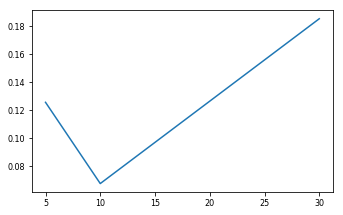

In [22]:
#print(np.array(error_u_v_h_nb).shape)
plt.plot(nb,np.array(error_u_v_h_nb)[:,2])

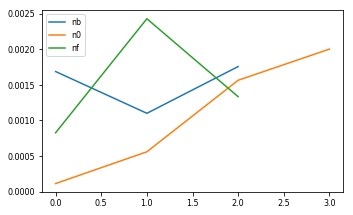

In [29]:
plt.plot(range(3),np.array(bounded_nb)+np.array(sol_nb)+np.array(pde_nb),label="nb")
plt.plot(range(4),np.array(bounded_n0)+np.array(sol_n0)+np.array(pde_n0),label="n0")
plt.plot(range(3),np.array(bounded_nf)+np.array(sol_nf)+np.array(pde_nf),label="nf")
plt.legend()

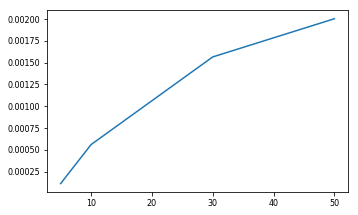

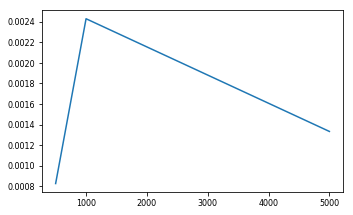

In [69]:
value = np.array(np.array([np.array(bounded_n0)+np.array(sol_n0)+np.array(pde_n0)])[0,3])
v2 = np.array(np.array(bounded_l)+np.array(sol_l)+np.array(pde_l))

In [70]:
y = np.hstack((value,v2))
print(y)
y.shape

[0.00200196 0.01634546 0.05116236 0.04478643]


(4,)

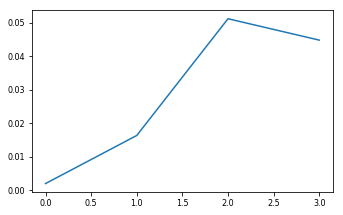

In [72]:
plt.plot(range(4),y)